In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



## Data Understanding and exploration

In [2]:
lending_data = pd.read_csv("lendingclubdata.csv", encoding = "UTF-8")

In [3]:
lending_data.shape

(10000, 28)

In [4]:
lending_data.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [5]:
lending_data.tail()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
9995,9996,0,Cabot,5,MORTGAGE,66250.0,VERIFIED - income,n,NaN,wedding,...,NaN,8.0,0.0,3656,24.1,10.0,f,0.0,2,PC3
9996,9997,0,Gallant & Wein,1,RENT,26000.0,VERIFIED - income source,n,Borrower added on 08/30/11 > credit cards cons...,debt consolidation,...,NaN,8.0,0.0,6709,58.9,12.0,f,0.0,2,PC3
9997,9998,0,"Weichert, Realtors",8,RENT,47831.0,not verified,n,Borrower added on 03/10/10 > My dream is to fi...,debt consolidation,...,111.0,9.0,1.0,11346,60.7,17.0,f,0.0,3,PC3
9998,9999,0,meadwestvaco,6,MORTGAGE,70000.0,not verified,n,NaN,major purchase,...,NaN,9.0,0.0,17157,50.9,27.0,f,0.0,2,PC3
9999,10000,0,Rehab Alliance,1,RENT,70560.0,not verified,n,Borrower added on 11/09/11 > order to pay ba...,credit card,...,NaN,15.0,0.0,2304,22.6,34.0,f,0.0,2,PC5


In [6]:
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           10000 non-null  int64  
 1   is_bad                       10000 non-null  int64  
 2   emp_title                    9408 non-null   object 
 3   emp_length                   10000 non-null  object 
 4   home_ownership               10000 non-null  object 
 5   annual_inc                   9999 non-null   float64
 6   verification_status          10000 non-null  object 
 7   pymnt_plan                   10000 non-null  object 
 8   Notes                        6770 non-null   object 
 9   purpose_cat                  10000 non-null  object 
 10  purpose                      9996 non-null   object 
 11  zip_code                     10000 non-null  object 
 12  addr_state                   10000 non-null  object 
 13  debt_to_income   

In [7]:
lending_data.describe()

,Id,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog
count,10000.00000,10000.000000,9999.000000,10000.000000,9995.000000,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9974.000000,9995.000000,9968.0,10000.000000
mean,5000.50000,0.129500,68203.011539,13.338704,0.148174,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.450771,22.011306,0.0,2.002200
std,2886.89568,0.335769,48590.252757,6.754212,0.506270,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.220557,11.709400,0.0,0.810963
min,1.00000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.0,1.000000
25%,2500.75000,0.000000,40000.000000,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,0.0,1.000000
50%,5000.50000,0.000000,58000.000000,13.410000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,0.0,2.000000
75%,7500.25000,0.000000,82000.000000,18.692500,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,0.0,3.000000
max,10000.00000,1.000000,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,0.0,3.000000


In [8]:
lending_data.drop_duplicates()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,Cabot,5,MORTGAGE,66250.0,VERIFIED - income,n,NaN,wedding,...,NaN,8.0,0.0,3656,24.1,10.0,f,0.0,2,PC3
9996,9997,0,Gallant & Wein,1,RENT,26000.0,VERIFIED - income source,n,Borrower added on 08/30/11 > credit cards cons...,debt consolidation,...,NaN,8.0,0.0,6709,58.9,12.0,f,0.0,2,PC3
9997,9998,0,"Weichert, Realtors",8,RENT,47831.0,not verified,n,Borrower added on 03/10/10 > My dream is to fi...,debt consolidation,...,111.0,9.0,1.0,11346,60.7,17.0,f,0.0,3,PC3
9998,9999,0,meadwestvaco,6,MORTGAGE,70000.0,not verified,n,NaN,major purchase,...,NaN,9.0,0.0,17157,50.9,27.0,f,0.0,2,PC3


In [9]:
lending_data = lending_data.drop('Id', axis=1)

In [10]:
lending_data

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,Medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,My Debt Consolidation Loan,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,AP Personal Loan,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,Debt Consolidation Loan,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,consolidate,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,Cabot,5,MORTGAGE,66250.0,VERIFIED - income,n,NaN,wedding,Scottish Wedding,...,NaN,8.0,0.0,3656,24.1,10.0,f,0.0,2,PC3
9996,0,Gallant & Wein,1,RENT,26000.0,VERIFIED - income source,n,Borrower added on 08/30/11 > credit cards cons...,debt consolidation,debt,...,NaN,8.0,0.0,6709,58.9,12.0,f,0.0,2,PC3
9997,0,"Weichert, Realtors",8,RENT,47831.0,not verified,n,Borrower added on 03/10/10 > My dream is to fi...,debt consolidation,Harnessing credit debt for a stable future.,...,111.0,9.0,1.0,11346,60.7,17.0,f,0.0,3,PC3
9998,0,meadwestvaco,6,MORTGAGE,70000.0,not verified,n,NaN,major purchase,personal,...,NaN,9.0,0.0,17157,50.9,27.0,f,0.0,2,PC3


### Checking for missing values

In [11]:
lending_data.isnull().sum()

is_bad                            0
emp_title                       592
emp_length                        0
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
Notes                          3230
purpose_cat                       0
purpose                           4
zip_code                          0
addr_state                        0
debt_to_income                    0
delinq_2yrs                       5
earliest_cr_line                  5
inq_last_6mths                    5
mths_since_last_delinq         6316
mths_since_last_record         9160
open_acc                          5
pub_rec                           5
revol_bal                         0
revol_util                       26
total_acc                         5
initial_list_status               0
collections_12_mths_ex_med       32
mths_since_last_major_derog       0
policy_code                       0
dtype: int64

In [12]:
100* lending_data.isnull().sum() / len(lending_data)

is_bad                          0.00
emp_title                       5.92
emp_length                      0.00
home_ownership                  0.00
annual_inc                      0.01
verification_status             0.00
pymnt_plan                      0.00
Notes                          32.30
purpose_cat                     0.00
purpose                         0.04
zip_code                        0.00
addr_state                      0.00
debt_to_income                  0.00
delinq_2yrs                     0.05
earliest_cr_line                0.05
inq_last_6mths                  0.05
mths_since_last_delinq         63.16
mths_since_last_record         91.60
open_acc                        0.05
pub_rec                         0.05
revol_bal                       0.00
revol_util                      0.26
total_acc                       0.05
initial_list_status             0.00
collections_12_mths_ex_med      0.32
mths_since_last_major_derog     0.00
policy_code                     0.00
d

### Dropping mths_since_last_record, mths_since_last_delinq and Notes since they have high number of missing values.

In [13]:
lending_data = lending_data.drop(['mths_since_last_delinq', 'mths_since_last_record','collections_12_mths_ex_med', 'Notes'],axis=1)

In [14]:
100* lending_data.isnull().sum() / len(lending_data)

is_bad                         0.00
emp_title                      5.92
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.01
verification_status            0.00
pymnt_plan                     0.00
purpose_cat                    0.00
purpose                        0.04
zip_code                       0.00
addr_state                     0.00
debt_to_income                 0.00
delinq_2yrs                    0.05
earliest_cr_line               0.05
inq_last_6mths                 0.05
open_acc                       0.05
pub_rec                        0.05
revol_bal                      0.00
revol_util                     0.26
total_acc                      0.05
initial_list_status            0.00
mths_since_last_major_derog    0.00
policy_code                    0.00
dtype: float64

## Plotting graph for the missing data

In [15]:
def percent_missing(lending_data):
    percent_nan = 100* lending_data.isnull().sum() / len(lending_data)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [16]:
percent_nan = percent_missing(lending_data)

<function matplotlib.pyplot.show(close=None, block=None)>

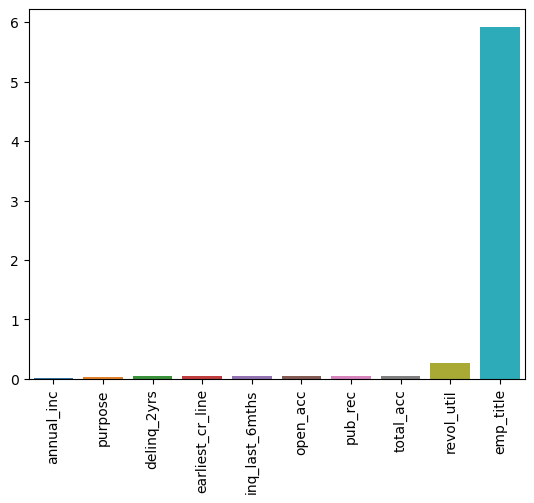

In [17]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.show

### Shows data that has less than 1% missing values

(0.0, 1.0)

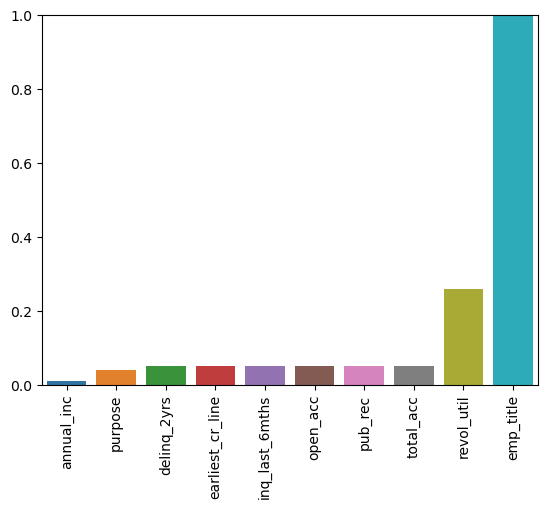

In [18]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

# Set 1% Threshold
plt.ylim(0,1)

### Dropping values for missing data

In [19]:
lending_data[lending_data['annual_inc'].isnull()]


,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
7592,0,NaN,1,NONE,NaN,not verified,n,other,Moving expenses and security deposit,100xx,...,NaN,NaN,NaN,NaN,0,NaN,NaN,f,2,PC1


In [20]:
lending_data = lending_data.drop(7592)

In [21]:
lending_data['purpose']

0                                           Medical
1                        My Debt Consolidation Loan
2                                  AP Personal Loan
3                           Debt Consolidation Loan
4                                       consolidate
                           ...                     
9995                               Scottish Wedding
9996                                           debt
9997    Harnessing credit debt for a stable future.
9998                                       personal
9999                               Credit Card Loan
Name: purpose, Length: 9999, dtype: object

In [22]:
lending_data[lending_data['purpose'].isnull()]


,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
1114,1,Tulsa Public Schools,11,RENT,39804.0,VERIFIED - income,n,debt consolidation small business,NaN,741xx,...,10/1/95,2.0,9.0,0.0,1309,12.7,27.0,f,2,PC4
2746,0,AAFES,6,RENT,12000.0,not verified,n,other,NaN,782xx,...,8/1/05,3.0,4.0,0.0,440,11.9,10.0,f,2,PC3
2749,0,Dbl Labs,4,OWN,30000.0,VERIFIED - income source,n,other,NaN,563xx,...,2/1/90,1.0,15.0,0.0,13155,44.1,23.0,f,2,PC3
7719,1,NaN,na,MORTGAGE,73200.0,not verified,n,small business,NaN,446xx,...,6/1/84,4.0,16.0,0.0,7952,19.4,43.0,f,2,PC5


In [23]:
lending_data['purpose'] = lending_data['purpose'].fillna("Didn't give one ")

In [24]:
lending_data[lending_data['delinq_2yrs'].isnull()]

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
4319,0,NaN,1,RENT,180000.0,not verified,n,other,Wedding coming up,100xx,...,NaN,NaN,NaN,NaN,0,NaN,NaN,f,2,PC5
4328,0,Mana Products,6,RENT,50000.0,not verified,n,other,Lowering My Interest Costs,100xx,...,NaN,NaN,NaN,NaN,0,NaN,NaN,f,3,PC1
4678,0,NaN,1,RENT,6000.0,not verified,n,other,Summer stuff,325xx,...,NaN,NaN,NaN,NaN,0,NaN,NaN,f,2,PC1
6232,0,College Pro Painters,3,MORTGAGE,6500.0,not verified,n,other,Credit card refinancing,806xx,...,NaN,NaN,NaN,NaN,0,NaN,NaN,f,1,PC1


These rows are dropped becaues they contain a lot of missing data

In [25]:
lending_data = lending_data.drop([4319, 4328, 4678, 6232])

In [26]:
lending_data[lending_data['earliest_cr_line'].isnull()]
lending_data[lending_data['inq_last_6mths'].isnull()]
lending_data[lending_data['open_acc'].isnull()]
lending_data[lending_data['pub_rec'].isnull()]
lending_data[lending_data['total_acc'].isnull()]

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code


Checking missing values for the all the rest of columns after removing rows with lot of missing data, turns out they were all the rows that missed that data 
___


### Filling values for missing data

In [27]:
lending_data['revol_util'].sort_values()

2259    0.0
4270    0.0
1625    0.0
7039    0.0
5214    0.0
       ... 
8141    NaN
8565    NaN
8785    NaN
9465    NaN
9833    NaN
Name: revol_util, Length: 9995, dtype: float64

In [28]:
lending_data[lending_data['revol_util'].isnull()]


,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
231,0,Clark University,3,RENT,4200.0,not verified,n,educational,Paying for my last semester of college,024xx,...,8/1/05,0.0,6.0,0.0,0,NaN,6.0,f,2,PC5
530,0,Aurora Multimedia,1,RENT,18000.0,VERIFIED - income source,n,moving,Moving/Relocation,088xx,...,9/1/06,2.0,11.0,0.0,0,NaN,11.0,f,3,PC2
1413,0,NaN,na,RENT,18000.0,VERIFIED - income,n,debt consolidation,Debt Consolidation Loan,430xx,...,9/1/06,0.0,9.0,0.0,0,NaN,10.0,f,1,PC1
2102,0,Jet West Music Group Ltd,1,MORTGAGE,36000.0,not verified,n,small business,Operation: ROCK the HOUSE,891xx,...,2/1/03,2.0,3.0,0.0,0,NaN,6.0,f,2,PC2
2154,0,NaN,na,MORTGAGE,35000.0,not verified,n,home improvement,home project loan,985xx,...,12/1/07,2.0,2.0,0.0,0,NaN,5.0,f,2,PC5
3206,0,Warner Music Group,2,RENT,85000.0,not verified,n,wedding,Loan for wedding & honeymoon,904xx,...,10/1/98,0.0,12.0,0.0,0,NaN,39.0,f,1,PC4
3630,0,perlmart shoprite,5,MORTGAGE,110000.0,VERIFIED - income,n,other,mother,088xx,...,12/1/89,0.0,5.0,0.0,49238,NaN,22.0,f,1,PC5
3823,0,PENNRIDGE HS,1,OWN,43500.0,not verified,n,credit card,peterspencervalimont,189xx,...,12/1/01,3.0,1.0,0.0,0,NaN,3.0,f,1,PC4
4182,0,AOL LLC,9,MORTGAGE,280000.0,VERIFIED - income,n,other,Real Estate Investor Loan,201xx,...,9/1/87,1.0,8.0,0.0,290291,NaN,46.0,f,3,PC3
5199,0,Wings Nine Inc.,2,RENT,14000.0,not verified,n,debt consolidation,Debt consolidation,483xx,...,8/1/05,4.0,2.0,0.0,0,NaN,3.0,f,1,PC5


In [29]:
lending_data['revol_util'] = lending_data['revol_util'].fillna(48)

Filling the missing data with mean value for the given 

In [30]:
lending_data['emp_title']

0          Time Warner Cable
1          Ottawa University
2             Kennedy Wilson
3         TOWN OF PLATTEKILL
4       Belmont Correctional
                ...         
9995                   Cabot
9996          Gallant & Wein
9997      Weichert, Realtors
9998            meadwestvaco
9999          Rehab Alliance
Name: emp_title, Length: 9995, dtype: object

In [31]:
lending_data[lending_data['emp_title'].isnull()]


,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
9,0,NaN,1,RENT,40000.0,not verified,n,car,FICO score 762 want's to buy a new car,926xx,...,5/1/95,1.0,11.0,0.0,19998,18.3,23.0,f,1,PC5
10,0,NaN,3,RENT,74000.0,VERIFIED - income source,n,credit card,Credit Card Consolidation,921xx,...,12/1/90,0.0,10.0,0.0,15046,39.9,18.0,f,1,PC4
16,1,NaN,10,OWN,22000.0,VERIFIED - income source,n,other small business,Suitable Select,324xx,...,9/1/93,0.0,4.0,0.0,8511,78.8,9.0,m,3,PC2
101,0,NaN,3,RENT,61000.0,VERIFIED - income source,n,vacation,Mororcco Vacation,752xx,...,10/1/06,5.0,8.0,0.0,1939,6.2,9.0,f,3,PC2
118,0,NaN,2,MORTGAGE,100000.0,VERIFIED - income source,n,debt consolidation,Debt Consolidation Loan,256xx,...,5/1/95,0.0,10.0,1.0,9331,79.1,24.0,f,2,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0,NaN,8,MORTGAGE,90000.0,not verified,n,other,Medical,331xx,...,7/1/99,2.0,7.0,0.0,5720,88.0,14.0,f,1,PC5
9838,1,NaN,7,MORTGAGE,175000.0,VERIFIED - income source,n,home improvement,New Garage,816xx,...,4/1/94,2.0,3.0,0.0,28240,94.1,7.0,f,1,PC2
9958,0,NaN,4,MORTGAGE,226000.0,VERIFIED - income source,n,small business,Expansion,711xx,...,5/1/95,3.0,8.0,0.0,32891,77.8,25.0,f,2,PC3
9960,0,NaN,na,MORTGAGE,65000.0,VERIFIED - income source,n,debt consolidation,Out of Debt Loan,211xx,...,2/1/81,0.0,12.0,0.0,64351,49.1,29.0,f,3,PC4


In [32]:
lending_data['emp_title'] = lending_data['emp_title'].fillna('None')

In [33]:
lending_data.isnull().sum()

is_bad                         0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose_cat                    0
purpose                        0
zip_code                       0
addr_state                     0
debt_to_income                 0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
mths_since_last_major_derog    0
policy_code                    0
dtype: int64

In [34]:
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_bad                       9995 non-null   int64  
 1   emp_title                    9995 non-null   object 
 2   emp_length                   9995 non-null   object 
 3   home_ownership               9995 non-null   object 
 4   annual_inc                   9995 non-null   float64
 5   verification_status          9995 non-null   object 
 6   pymnt_plan                   9995 non-null   object 
 7   purpose_cat                  9995 non-null   object 
 8   purpose                      9995 non-null   object 
 9   zip_code                     9995 non-null   object 
 10  addr_state                   9995 non-null   object 
 11  debt_to_income               9995 non-null   float64
 12  delinq_2yrs                  9995 non-null   float64
 13  earliest_cr_line  

In [35]:
lending_data.describe()

,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
count,9995.000000,9995.00000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9.995000e+03,9995.000000,9995.000000,9995.000000
mean,0.129565,68206.04426,13.342519,0.148174,1.066933,9.334567,0.060130,1.427815e+04,48.449824,22.011306,2.002201
std,0.335841,48578.86120,6.753147,0.506270,1.476052,4.526590,0.251245,2.544227e+04,28.190900,11.709400,0.811042
min,0.000000,2000.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,0.000000,40000.00000,8.160000,0.000000,0.000000,6.000000,0.000000,3.527500e+03,25.000000,13.000000,1.000000
50%,0.000000,58000.00000,13.420000,0.000000,1.000000,9.000000,0.000000,8.652000e+03,48.600000,20.000000,2.000000
75%,0.000000,82000.00000,18.700000,0.000000,2.000000,12.000000,0.000000,1.695400e+04,71.800000,29.000000,3.000000
max,1.000000,900000.00000,29.990000,11.000000,25.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,3.000000


### Cheking for outliers and removing them 

<AxesSubplot:ylabel='mths_since_last_major_derog'>

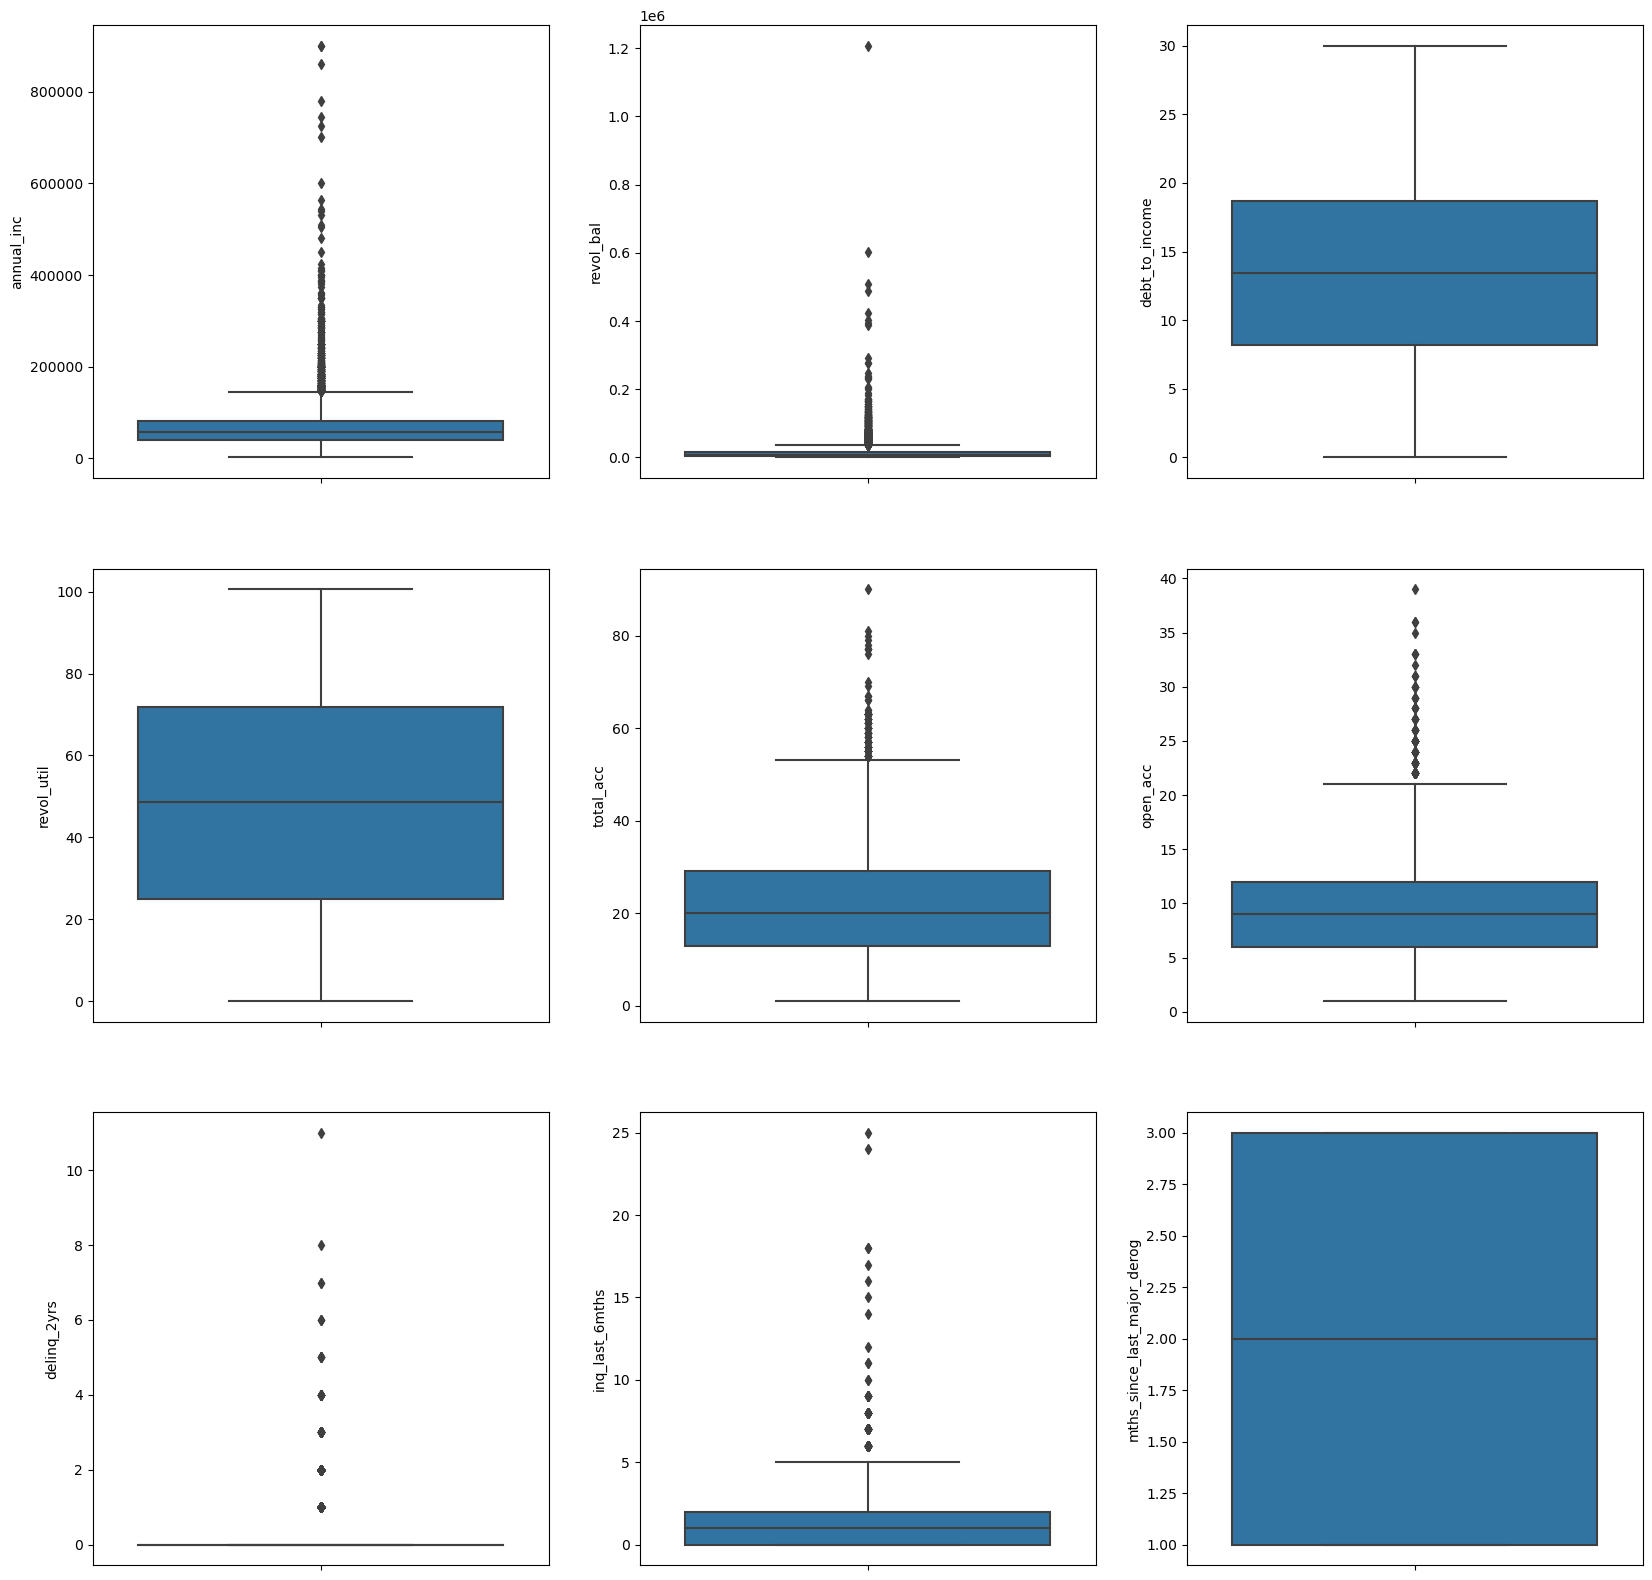

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.boxplot(y=lending_data.annual_inc, data=lending_data)
plt.subplot(3, 3, 2)
sns.boxplot(y=lending_data.revol_bal, data=lending_data)
plt.subplot(3, 3, 3)
sns.boxplot(y=lending_data.debt_to_income, data=lending_data)
plt.subplot(3, 3, 4)
sns.boxplot(y=lending_data.revol_util, data=lending_data)
plt.subplot(3, 3, 5)
sns.boxplot(y=lending_data.total_acc, data=lending_data)
plt.subplot(3, 3, 6)
sns.boxplot(y=lending_data.open_acc, data=lending_data)
plt.subplot(3, 3, 7)
sns.boxplot(y=lending_data.delinq_2yrs, data=lending_data)
plt.subplot(3, 3, 8)
sns.boxplot(y=lending_data.inq_last_6mths, data=lending_data)
plt.subplot(3, 3, 9)
sns.boxplot(y=lending_data.mths_since_last_major_derog, data=lending_data)

In [37]:
# 25th and 75th percentile of the values in annual_inc column
Q1_es = lending_data.annual_inc.quantile(0.25)
Q3_es = lending_data.annual_inc.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
lending_data = lending_data[(lending_data.annual_inc < upper_es)]

In [38]:
# 25th and 75th percentile of the values in revol_bal column
Q1_es = lending_data.revol_bal.quantile(0.25)
Q3_es = lending_data.revol_bal.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
lending_data = lending_data[(lending_data.revol_bal < upper_es)]

In [39]:
lending_data.shape

(8917, 23)

<AxesSubplot:ylabel='mths_since_last_major_derog'>

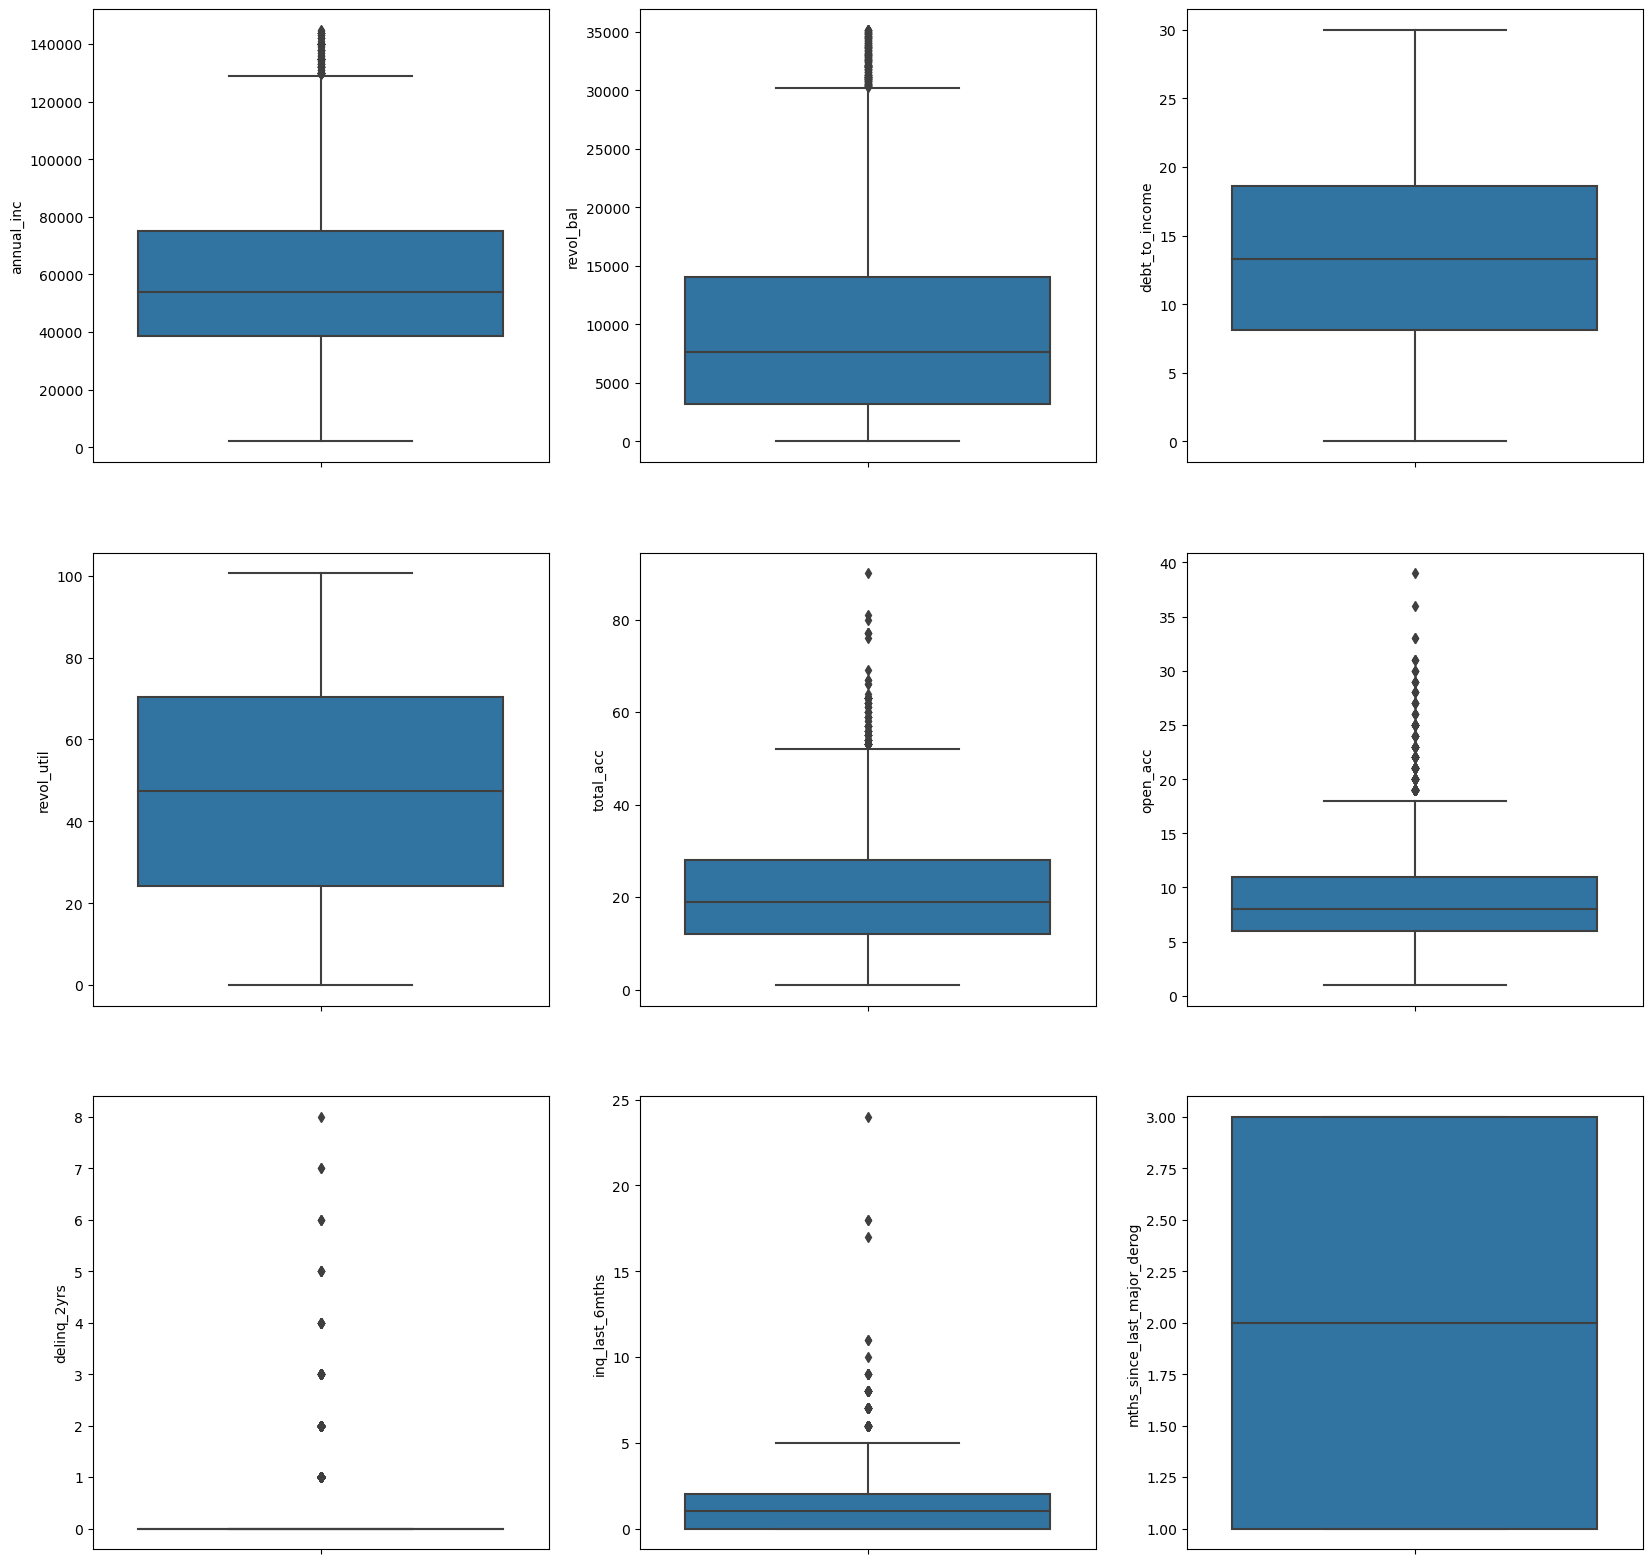

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.boxplot(y=lending_data.annual_inc, data=lending_data)
plt.subplot(3, 3, 2)
sns.boxplot(y=lending_data.revol_bal, data=lending_data)
plt.subplot(3, 3, 3)
sns.boxplot(y=lending_data.debt_to_income, data=lending_data)
plt.subplot(3, 3, 4)
sns.boxplot(y=lending_data.revol_util, data=lending_data)
plt.subplot(3, 3, 5)
sns.boxplot(y=lending_data.total_acc, data=lending_data)
plt.subplot(3, 3, 6)
sns.boxplot(y=lending_data.open_acc, data=lending_data)
plt.subplot(3, 3, 7)
sns.boxplot(y=lending_data.delinq_2yrs, data=lending_data)
plt.subplot(3, 3, 8)
sns.boxplot(y=lending_data.inq_last_6mths, data=lending_data)
plt.subplot(3, 3, 9)
sns.boxplot(y=lending_data.mths_since_last_major_derog, data=lending_data)

In [41]:
lending_data

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,zip_code,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
0,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,medical,Medical,766xx,...,12/1/92,0.0,15.0,0.0,12087,12.1,44.0,f,1,PC4
1,0,Ottawa University,1,RENT,39216.0,not verified,n,debt consolidation,My Debt Consolidation Loan,660xx,...,11/1/05,2.0,4.0,0.0,10114,64.0,5.0,f,2,PC1
2,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,credit card,AP Personal Loan,916xx,...,6/1/70,0.0,4.0,0.0,81,0.6,8.0,f,3,PC4
3,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,debt consolidation,Debt Consolidation Loan,124xx,...,9/1/82,0.0,6.0,0.0,10030,37.1,23.0,f,2,PC2
4,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,debt consolidation,consolidate,439xx,...,10/1/99,4.0,8.0,0.0,10740,40.4,21.0,f,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,Cabot,5,MORTGAGE,66250.0,VERIFIED - income,n,wedding,Scottish Wedding,014xx,...,9/1/01,1.0,8.0,0.0,3656,24.1,10.0,f,2,PC3
9996,0,Gallant & Wein,1,RENT,26000.0,VERIFIED - income source,n,debt consolidation,debt,112xx,...,5/1/00,1.0,8.0,0.0,6709,58.9,12.0,f,2,PC3
9997,0,"Weichert, Realtors",8,RENT,47831.0,not verified,n,debt consolidation,Harnessing credit debt for a stable future.,070xx,...,12/1/89,0.0,9.0,1.0,11346,60.7,17.0,f,3,PC3
9998,0,meadwestvaco,6,MORTGAGE,70000.0,not verified,n,major purchase,personal,244xx,...,3/1/99,2.0,9.0,0.0,17157,50.9,27.0,f,2,PC3


### Exploratory Data Analysis

In [42]:
lending_data['emp_title'].value_counts()

None                             520
US Army                           37
Bank of America                   22
USAF                              16
United States Air Force           16
                                ... 
Citrix Online                      1
Harper Construction Co., Inc.      1
Burns & Mcdonnell                  1
Messier Bugatti USA                1
Rehab Alliance                     1
Name: emp_title, Length: 7344, dtype: int64

In [43]:
lending_data['purpose'].value_counts()

Debt Consolidation                             492
Debt Consolidation Loan                        376
Personal Loan                                  129
Consolidation                                  113
debt consolidation                             112
                                              ... 
Debt Consolodation from Home Remodel             1
Kitchen remodel and landscaping                  1
My Debt Considation Loan                         1
Bathroom repair                                  1
Harnessing credit debt for a stable future.      1
Name: purpose, Length: 5091, dtype: int64

In [44]:
lending_data['purpose_cat'].value_counts()

debt consolidation                   4007
credit card                          1095
other                                 921
home improvement                      670
major purchase                        498
small business                        397
car                                   324
wedding                               239
medical                               166
moving                                147
educational                            96
vacation                               91
debt consolidation small business      90
house                                  83
other small business                   18
renewable energy                       15
credit card small business             13
small business small business          12
home improvement small business        10
major purchase small business           5
educational small business              5
house small business                    3
moving small business                   3
car small business                

In [45]:
lending_data['zip_code'].value_counts()

112xx    134
100xx    122
945xx    113
070xx    111
606xx    101
        ... 
425xx      1
469xx      1
251xx      1
831xx      1
637xx      1
Name: zip_code, Length: 713, dtype: int64

In [46]:
lending_data['earliest_cr_line'].value_counts()  

11/1/00    93
11/1/98    87
12/1/98    86
10/1/01    81
10/1/99    80
           ..
6/1/08      1
9/1/69      1
5/1/65      1
11/1/69     1
6/1/79      1
Name: earliest_cr_line, Length: 452, dtype: int64

In [47]:
lending_data['initial_list_status'].value_counts()  

f    8901
m      16
Name: initial_list_status, dtype: int64

<AxesSubplot:xlabel='is_bad', ylabel='count'>

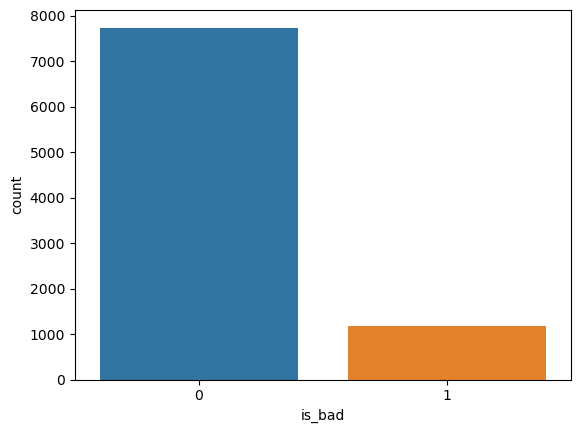

In [48]:
sns.countplot(x=lending_data.is_bad, data = lending_data)

#### The classes seem to be quite imbalanced, we will have to balance them using sampling techniques and using balanced weight class parameters for the class weight categories in all classification models.
___

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

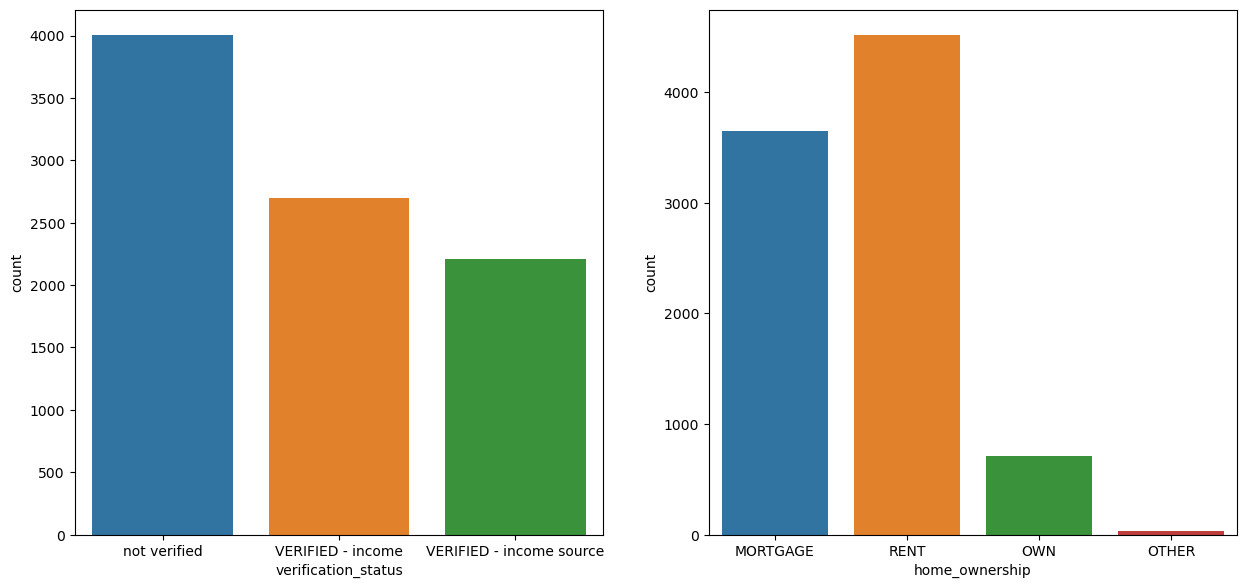

In [49]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
sns.countplot(x=lending_data.verification_status, data = lending_data)

plt.subplot(2, 2, 2)
sns.countplot(x=lending_data.home_ownership, data = lending_data)



<AxesSubplot:xlabel='policy_code', ylabel='count'>

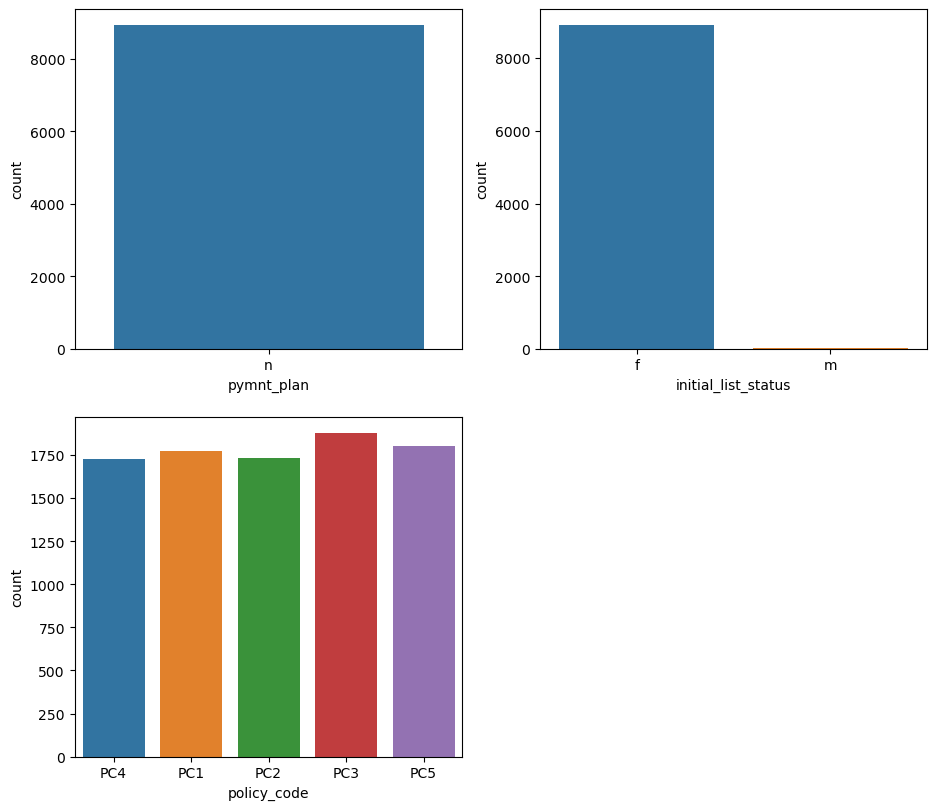

In [50]:
plt.figure(figsize=(11,15))
plt.subplot(3, 2, 1)
sns.countplot(x=lending_data.pymnt_plan, data = lending_data)

plt.subplot(3, 2, 2)
sns.countplot(x=lending_data.initial_list_status, data = lending_data)

plt.subplot(3, 2, 3)
sns.countplot(x=lending_data.policy_code, data = lending_data)


1. pymnt_plan and initital_list_status are to be dropped due to being highly imbalanced.


<AxesSubplot:xlabel='emp_length', ylabel='count'>

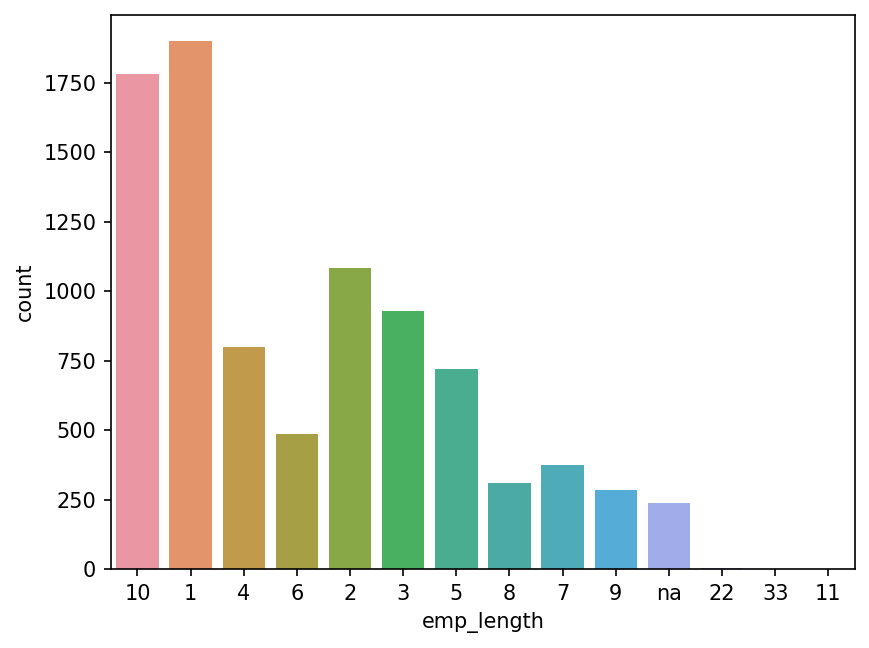

In [53]:
plt.figure(dpi=150)
sns.countplot(x=lending_data.emp_length, data = lending_data)


Looks like employees with minimum 10 years of experience are the most eligible for loans, followed by people in their 1st year of employment

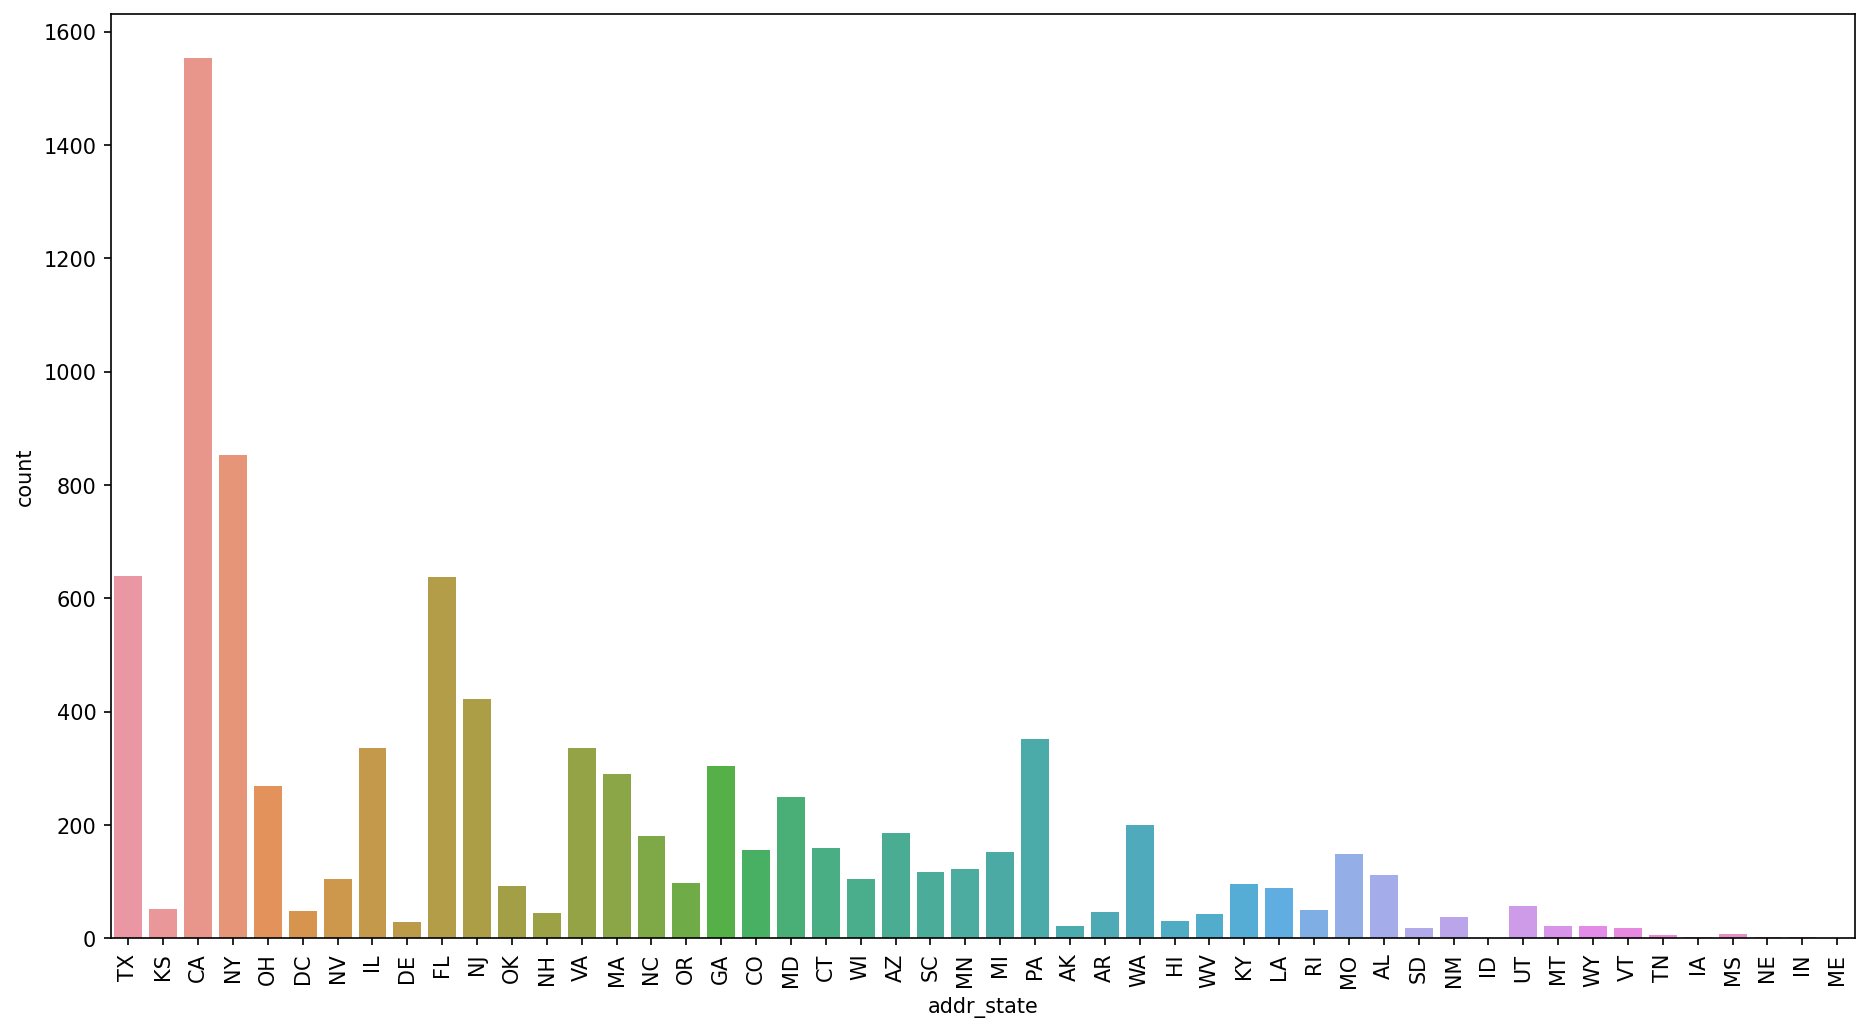

In [52]:
plt.figure(figsize=(15, 8), dpi=150)
sns.countplot(x=lending_data.addr_state, data = lending_data)
plt.xticks(rotation=90)
plt.show()

In [53]:
lending_data.corr()['is_bad'].sort_values(ascending=False)

is_bad                         1.000000
revol_util                     0.089633
pub_rec                        0.032050
debt_to_income                 0.025874
delinq_2yrs                    0.024308
mths_since_last_major_derog    0.017440
revol_bal                      0.013096
inq_last_6mths                 0.002086
open_acc                      -0.017427
total_acc                     -0.055177
annual_inc                    -0.073897
Name: is_bad, dtype: float64

<AxesSubplot:>

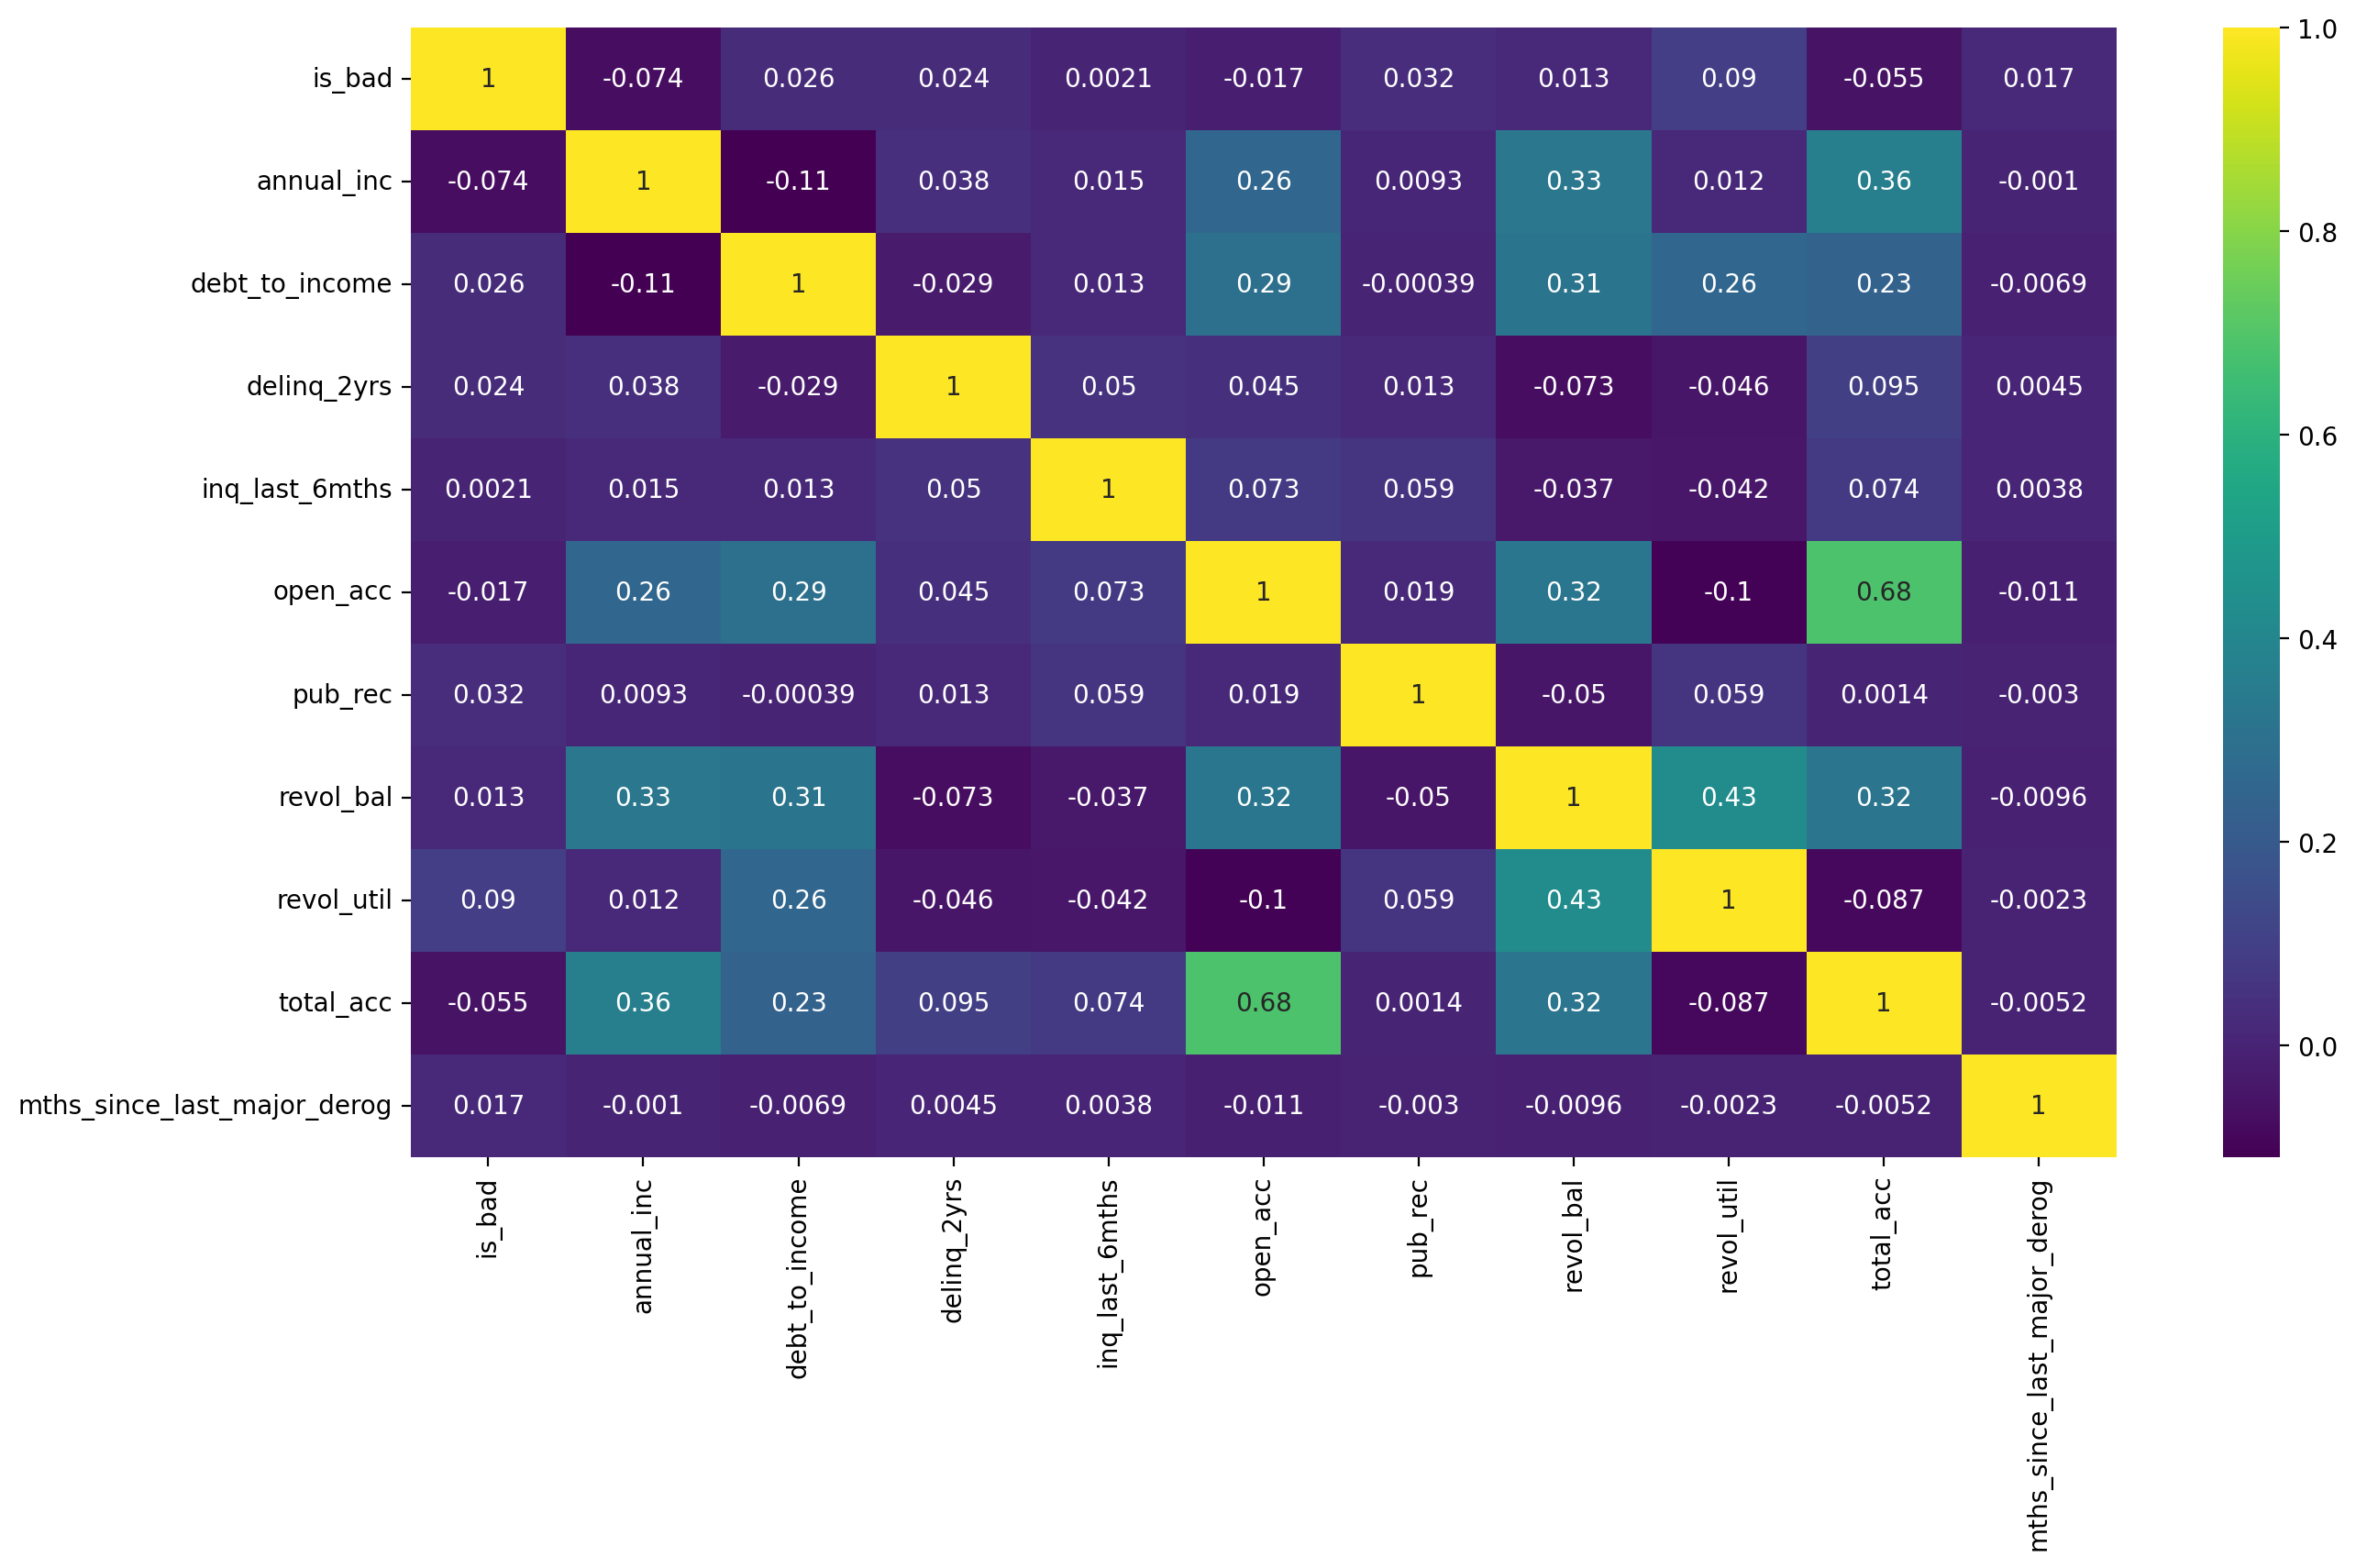

In [54]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap(lending_data.corr(), annot= True, cmap='viridis')

1. total_acc and open_acc are highly correlated and show multicolineartiy, so one of them needs to be dropped for better performance of the model.

### Feature Engineering

In [55]:

bin_edges = [0, 40000, 60000, 90000]  
bin_labels = ['Low', 'Medium', 'High']

# Use the `pd.cut` function to bin the data
lending_data['income_bin'] = pd.cut(lending_data['annual_inc'], bins=bin_edges, labels=bin_labels)


In [56]:
bin_edges = [0, 8, 13, 20]  # Adjust the bin edges as needed
bin_labels = ['Low', 'Medium', 'High']

# Use the `pd.cut` function to bin the data
lending_data['dti_bin'] = pd.cut(lending_data['debt_to_income'], bins=bin_edges, labels=bin_labels)


### Categorising Numerical and Categorical Data

In [57]:
lending_data_categorical = lending_data.select_dtypes(exclude=['float64','int64'])

In [58]:
lending_data_categorical.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose_cat', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'policy_code', 'income_bin',
       'dti_bin'],
      dtype='object')

Dropping categorical data columns
1. Dropping emp_title and policy_code because it is not significant towards the dataset
2. Dropping purpose, earliest_cr_line and zip_code because it has too many values and would need significant cleanup to provide useful statistical operational data.
3. Dropping initial_list_status and pymnt_plan because of high imbalance.

In [59]:
lending_data_categorical = lending_data_categorical.drop(['emp_title','policy_code','purpose','earliest_cr_line','zip_code', 'initial_list_status', 'pymnt_plan'], axis=1)

In [60]:
lending_data_categorical

,emp_length,home_ownership,verification_status,purpose_cat,addr_state,income_bin,dti_bin
0,10,MORTGAGE,not verified,medical,TX,Medium,Medium
1,1,RENT,not verified,debt consolidation,KS,Low,Medium
2,4,RENT,not verified,credit card,CA,High,Medium
3,10,MORTGAGE,not verified,debt consolidation,NY,Medium,Low
4,10,MORTGAGE,VERIFIED - income,debt consolidation,OH,Medium,High
...,...,...,...,...,...,...,...
9995,5,MORTGAGE,VERIFIED - income,wedding,MA,High,Medium
9996,1,RENT,VERIFIED - income source,debt consolidation,NY,Low,NaN
9997,8,RENT,not verified,debt consolidation,NJ,Medium,NaN
9998,6,MORTGAGE,not verified,major purchase,VA,High,High


In [61]:
lending_data_numerical = lending_data.select_dtypes(['float64','int64'])

In [62]:
lending_data_numerical.columns

Index(['is_bad', 'annual_inc', 'debt_to_income', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mths_since_last_major_derog'],
      dtype='object')

Dropping Numerical columns
1. Dropping annual_inc and revol_bal because we created income_bin and dti_bin for analysing them 


In [63]:
lending_data_numerical = lending_data_numerical.drop(['annual_inc','revol_bal'], axis=1)

In [64]:
lending_data_numerical

,is_bad,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,mths_since_last_major_derog
0,0,10.87,0.0,0.0,15.0,0.0,12.1,44.0,1
1,0,9.15,0.0,2.0,4.0,0.0,64.0,5.0,2
2,0,11.24,0.0,0.0,4.0,0.0,0.6,8.0,3
3,0,6.18,1.0,0.0,6.0,0.0,37.1,23.0,2
4,0,19.03,0.0,4.0,8.0,0.0,40.4,21.0,3
...,...,...,...,...,...,...,...,...,...
9995,0,9.40,0.0,1.0,8.0,0.0,24.1,10.0,2
9996,0,20.49,0.0,1.0,8.0,0.0,58.9,12.0,2
9997,0,24.13,0.0,0.0,9.0,1.0,60.7,17.0,3
9998,0,16.18,2.0,2.0,9.0,0.0,50.9,27.0,2


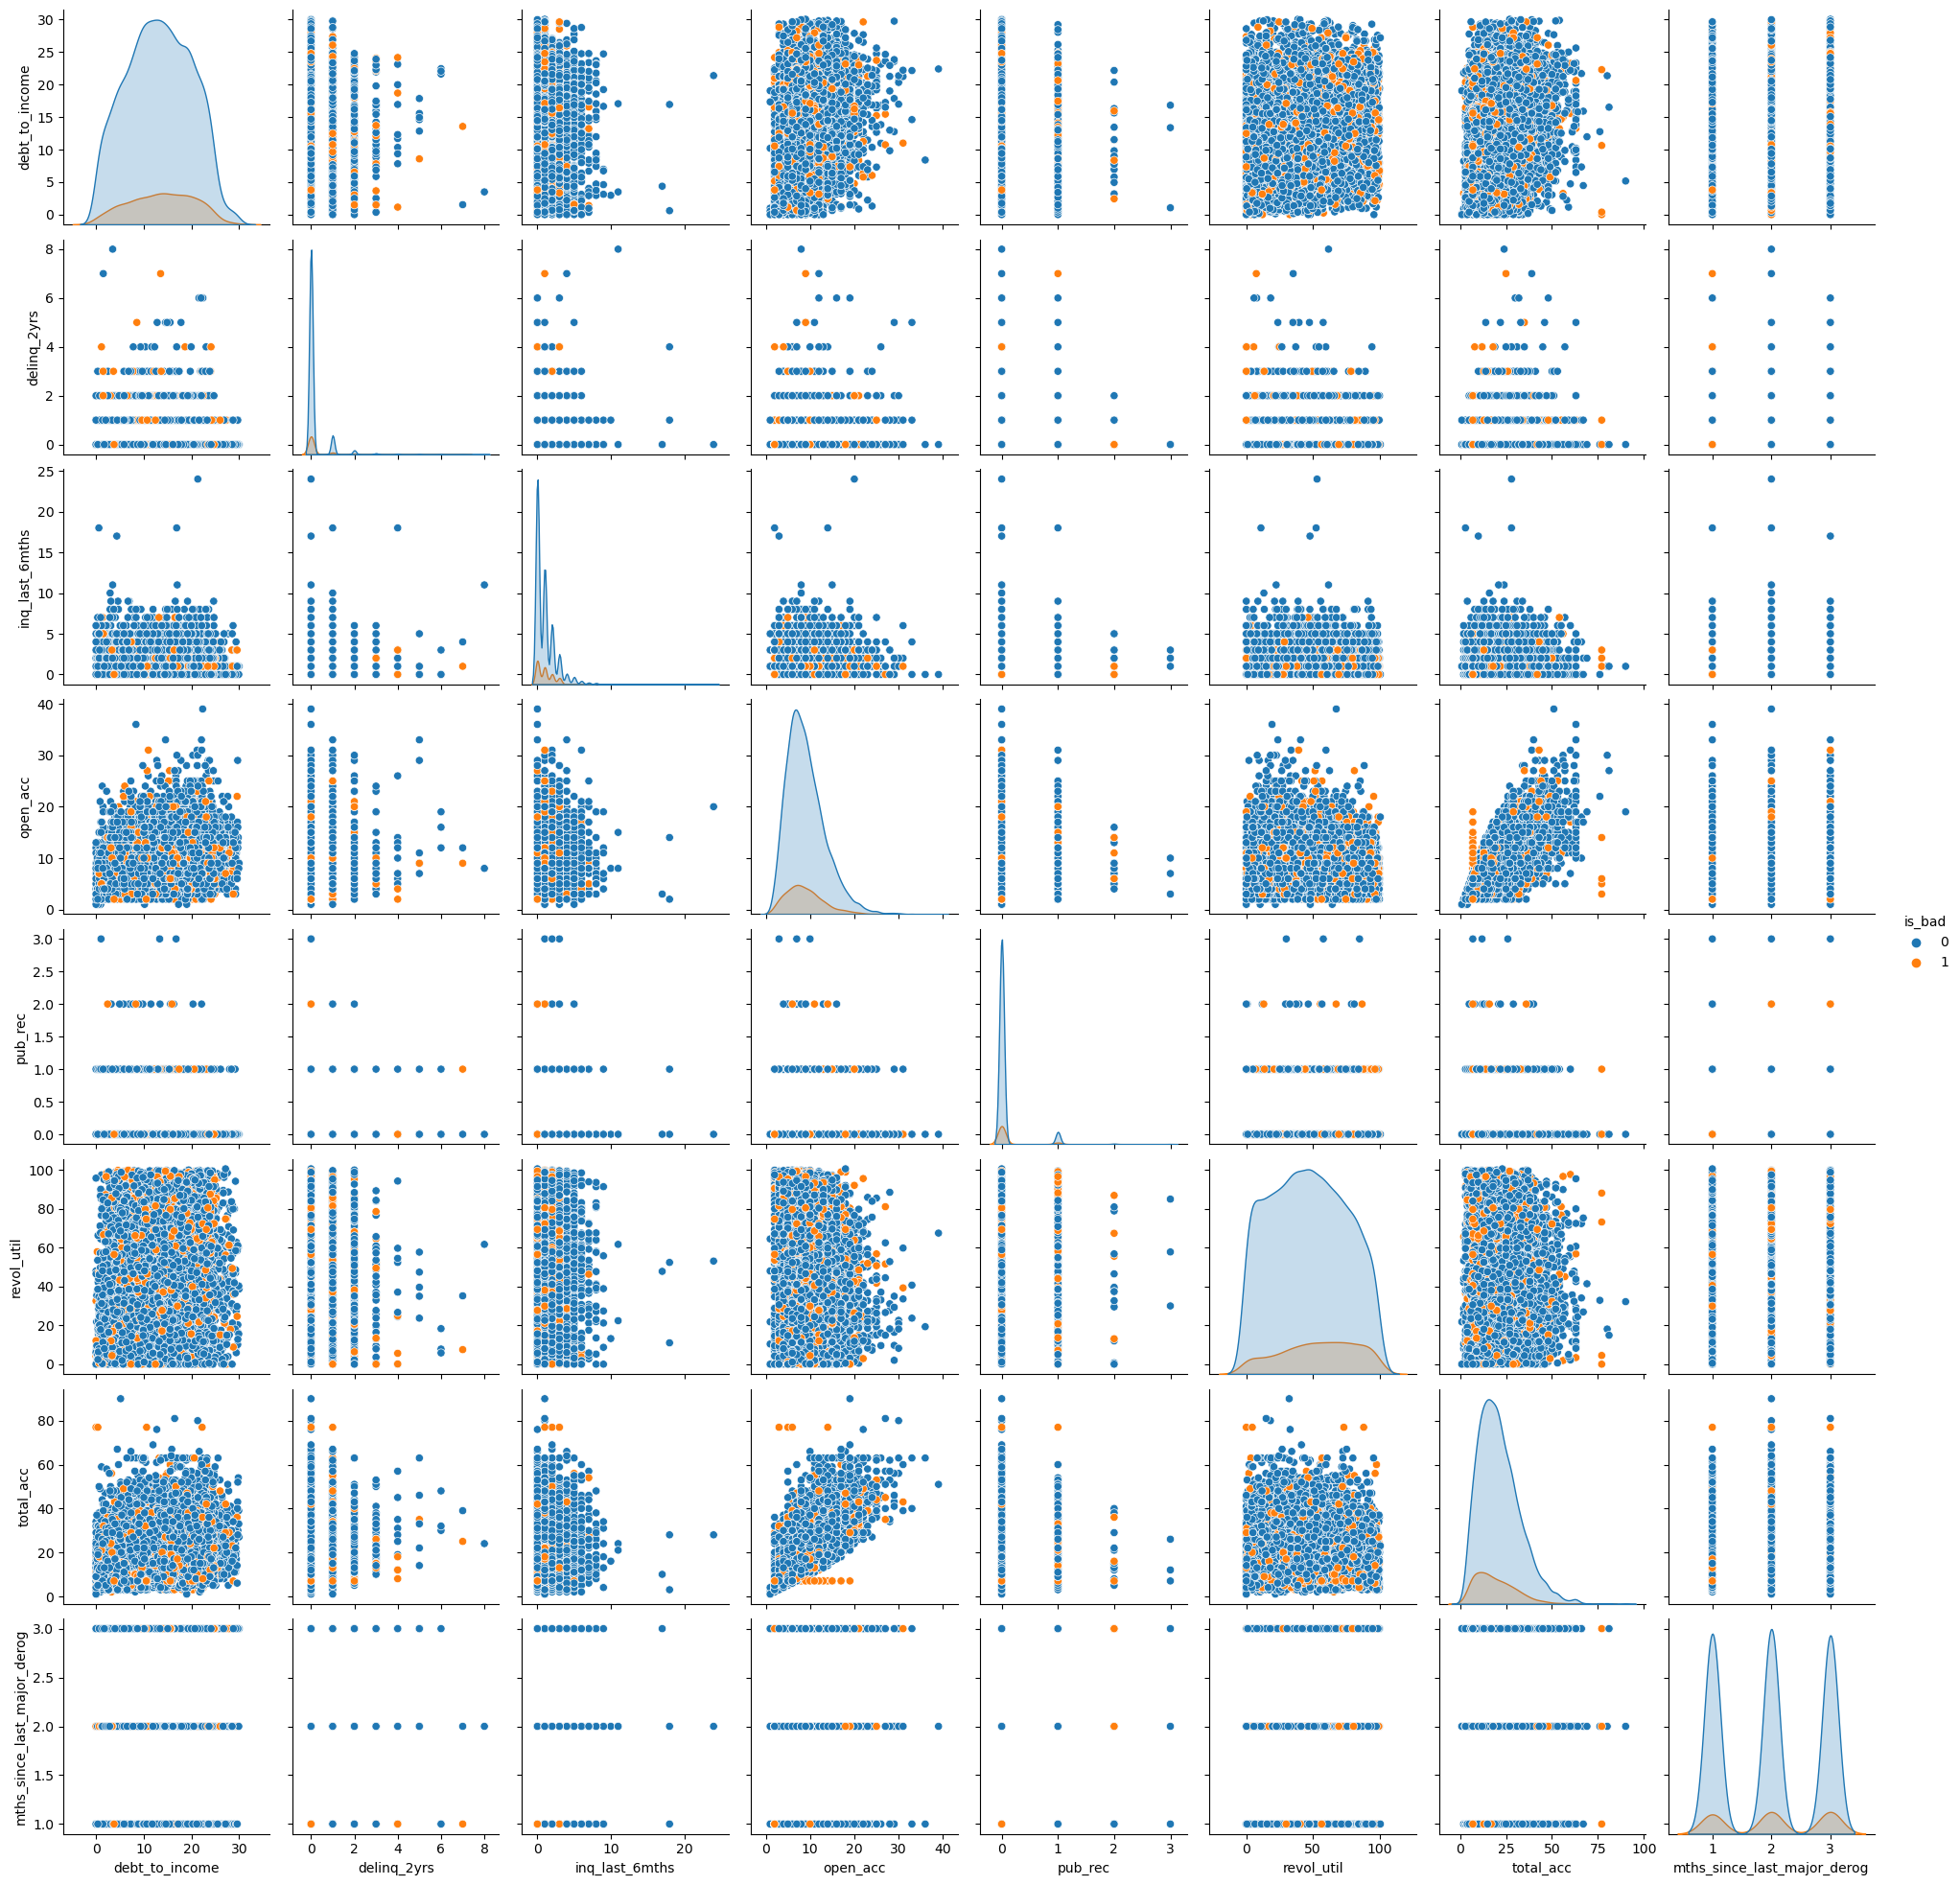

In [65]:
sns.pairplot(lending_data_numerical, hue='is_bad')

#### Changing categorical variables to numerical using one hot encoding

In [66]:
lending_data_dummies = pd.get_dummies(lending_data_categorical, drop_first=True)
lending_data_dummies.head()

,emp_length_10,emp_length_11,emp_length_2,emp_length_22,emp_length_3,emp_length_33,emp_length_4,emp_length_5,emp_length_6,emp_length_7,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,income_bin_Medium,income_bin_High,dti_bin_Medium,dti_bin_High
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [67]:
lending_data = lending_data.drop(list(lending_data_categorical.columns), axis=1)

In [68]:
lending_data = pd.concat([lending_data_numerical, lending_data_dummies], axis=1)

In [69]:
lending_data.head()

,is_bad,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,mths_since_last_major_derog,emp_length_10,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,income_bin_Medium,income_bin_High,dti_bin_Medium,dti_bin_High
0,0,10.87,0.0,0.0,15.0,0.0,12.1,44.0,1,1,...,0,0,0,0,0,0,1,0,1,0
1,0,9.15,0.0,2.0,4.0,0.0,64.0,5.0,2,0,...,0,0,0,0,0,0,0,0,1,0
2,0,11.24,0.0,0.0,4.0,0.0,0.6,8.0,3,0,...,0,0,0,0,0,0,0,1,1,0
3,0,6.18,1.0,0.0,6.0,0.0,37.1,23.0,2,1,...,0,0,0,0,0,0,1,0,0,0
4,0,19.03,0.0,4.0,8.0,0.0,40.4,21.0,3,1,...,0,0,0,0,0,0,1,0,0,1


In [70]:
lending_data


,is_bad,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,mths_since_last_major_derog,emp_length_10,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,income_bin_Medium,income_bin_High,dti_bin_Medium,dti_bin_High
0,0,10.87,0.0,0.0,15.0,0.0,12.1,44.0,1,1,...,0,0,0,0,0,0,1,0,1,0
1,0,9.15,0.0,2.0,4.0,0.0,64.0,5.0,2,0,...,0,0,0,0,0,0,0,0,1,0
2,0,11.24,0.0,0.0,4.0,0.0,0.6,8.0,3,0,...,0,0,0,0,0,0,0,1,1,0
3,0,6.18,1.0,0.0,6.0,0.0,37.1,23.0,2,1,...,0,0,0,0,0,0,1,0,0,0
4,0,19.03,0.0,4.0,8.0,0.0,40.4,21.0,3,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,9.40,0.0,1.0,8.0,0.0,24.1,10.0,2,0,...,0,0,0,0,0,0,0,1,1,0
9996,0,20.49,0.0,1.0,8.0,0.0,58.9,12.0,2,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,24.13,0.0,0.0,9.0,1.0,60.7,17.0,3,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,16.18,2.0,2.0,9.0,0.0,50.9,27.0,2,0,...,1,0,0,0,0,0,0,1,0,1


In [71]:
lending_data.corr()['is_bad'].sort_values(ascending=False)

is_bad                                           1.000000
purpose_cat_debt consolidation small business    0.259320
purpose_cat_other small business                 0.115501
purpose_cat_credit card small business           0.098130
purpose_cat_small business small business        0.094275
                                                   ...   
purpose_cat_wedding                             -0.035869
income_bin_High                                 -0.037191
verification_status_not verified                -0.052466
total_acc                                       -0.055177
purpose_cat_credit card                         -0.055749
Name: is_bad, Length: 106, dtype: float64

In [72]:
lending_data.corr()['is_bad'].sort_values(ascending=False)

is_bad                                           1.000000
purpose_cat_debt consolidation small business    0.259320
purpose_cat_other small business                 0.115501
purpose_cat_credit card small business           0.098130
purpose_cat_small business small business        0.094275
                                                   ...   
purpose_cat_wedding                             -0.035869
income_bin_High                                 -0.037191
verification_status_not verified                -0.052466
total_acc                                       -0.055177
purpose_cat_credit card                         -0.055749
Name: is_bad, Length: 106, dtype: float64

## Model Building


In [73]:
X = lending_data.drop('is_bad',axis=1)
y = lending_data['is_bad']

### Applying oversampling because of imbalanced data classes

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=101)

In [75]:
X_res, y_res = smote.fit_resample(X, y)

In [76]:
X_res.shape, y_res.shape

((15486, 105), (15486,))

____

In [77]:
X_res

,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,mths_since_last_major_derog,emp_length_10,emp_length_11,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,income_bin_Medium,income_bin_High,dti_bin_Medium,dti_bin_High
0,10.870000,0.000000,0.000000,15.000000,0.000000,12.100000,44.000000,1,1,0,...,0,0,0,0,0,0,1,0,1,0
1,9.150000,0.000000,2.000000,4.000000,0.000000,64.000000,5.000000,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.240000,0.000000,0.000000,4.000000,0.000000,0.600000,8.000000,3,0,0,...,0,0,0,0,0,0,0,1,1,0
3,6.180000,1.000000,0.000000,6.000000,0.000000,37.100000,23.000000,2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,19.030000,0.000000,4.000000,8.000000,0.000000,40.400000,21.000000,3,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,21.222312,0.819614,0.541158,2.000000,0.000000,0.000000,6.278456,2,0,0,...,0,0,0,0,0,0,0,0,0,0
15482,18.515404,0.000000,1.729947,6.810158,0.000000,80.381016,31.540105,2,0,0,...,0,0,0,0,0,0,0,1,0,1
15483,15.731718,0.000000,1.000000,14.000000,0.000000,38.259755,21.000000,2,0,0,...,0,0,0,0,0,0,0,0,0,1
15484,8.243723,0.000000,0.598385,12.409689,0.000000,45.423714,29.598385,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling data

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101)

In [80]:
scaler = StandardScaler()

In [81]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

____

### Model 1 (Logistic Regression Model)

In [82]:
from sklearn.linear_model import LogisticRegressionCV 

In [83]:
log_model = LogisticRegressionCV(class_weight='balanced')

In [84]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(class_weight='balanced')

In [85]:
coefficients = log_model.coef_[0]

In [86]:
feature_importance = np.abs(coefficients)

In [87]:
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X.columns[sorted_indices]

In [88]:
for feature, importance in zip(sorted_features, feature_importance[sorted_indices]):
    print(f"{feature}: {importance}")

addr_state_CA: 1.1570985149373665
addr_state_NY: 0.9484242801842938
addr_state_TX: 0.8855888515728663
purpose_cat_debt consolidation: 0.8169528155420277
addr_state_FL: 0.7701494334220685
addr_state_PA: 0.6623560747294455
addr_state_NJ: 0.6288280182653136
addr_state_VA: 0.627819090604085
addr_state_IL: 0.6212611976406553
purpose_cat_credit card: 0.5878295249034137
addr_state_OH: 0.5774783467510216
addr_state_GA: 0.5406107850911706
addr_state_MD: 0.5398497680360208
addr_state_MI: 0.5027089809125775
addr_state_MA: 0.49636025523286487
addr_state_MN: 0.4833963212859492
addr_state_CO: 0.47059555758689264
purpose_cat_other: 0.4555337460405329
purpose_cat_debt consolidation small business: 0.43605173987007684
addr_state_WA: 0.4339487476189087
addr_state_AZ: 0.43386832110427614
addr_state_MO: 0.42702854914596083
addr_state_CT: 0.41282682733442205
addr_state_NC: 0.40805683622820693
purpose_cat_home improvement: 0.3976879640962619
addr_state_SC: 0.36692238606293526
verification_status_not verifie

Text(0.5, 1.0, 'Feature Importance')

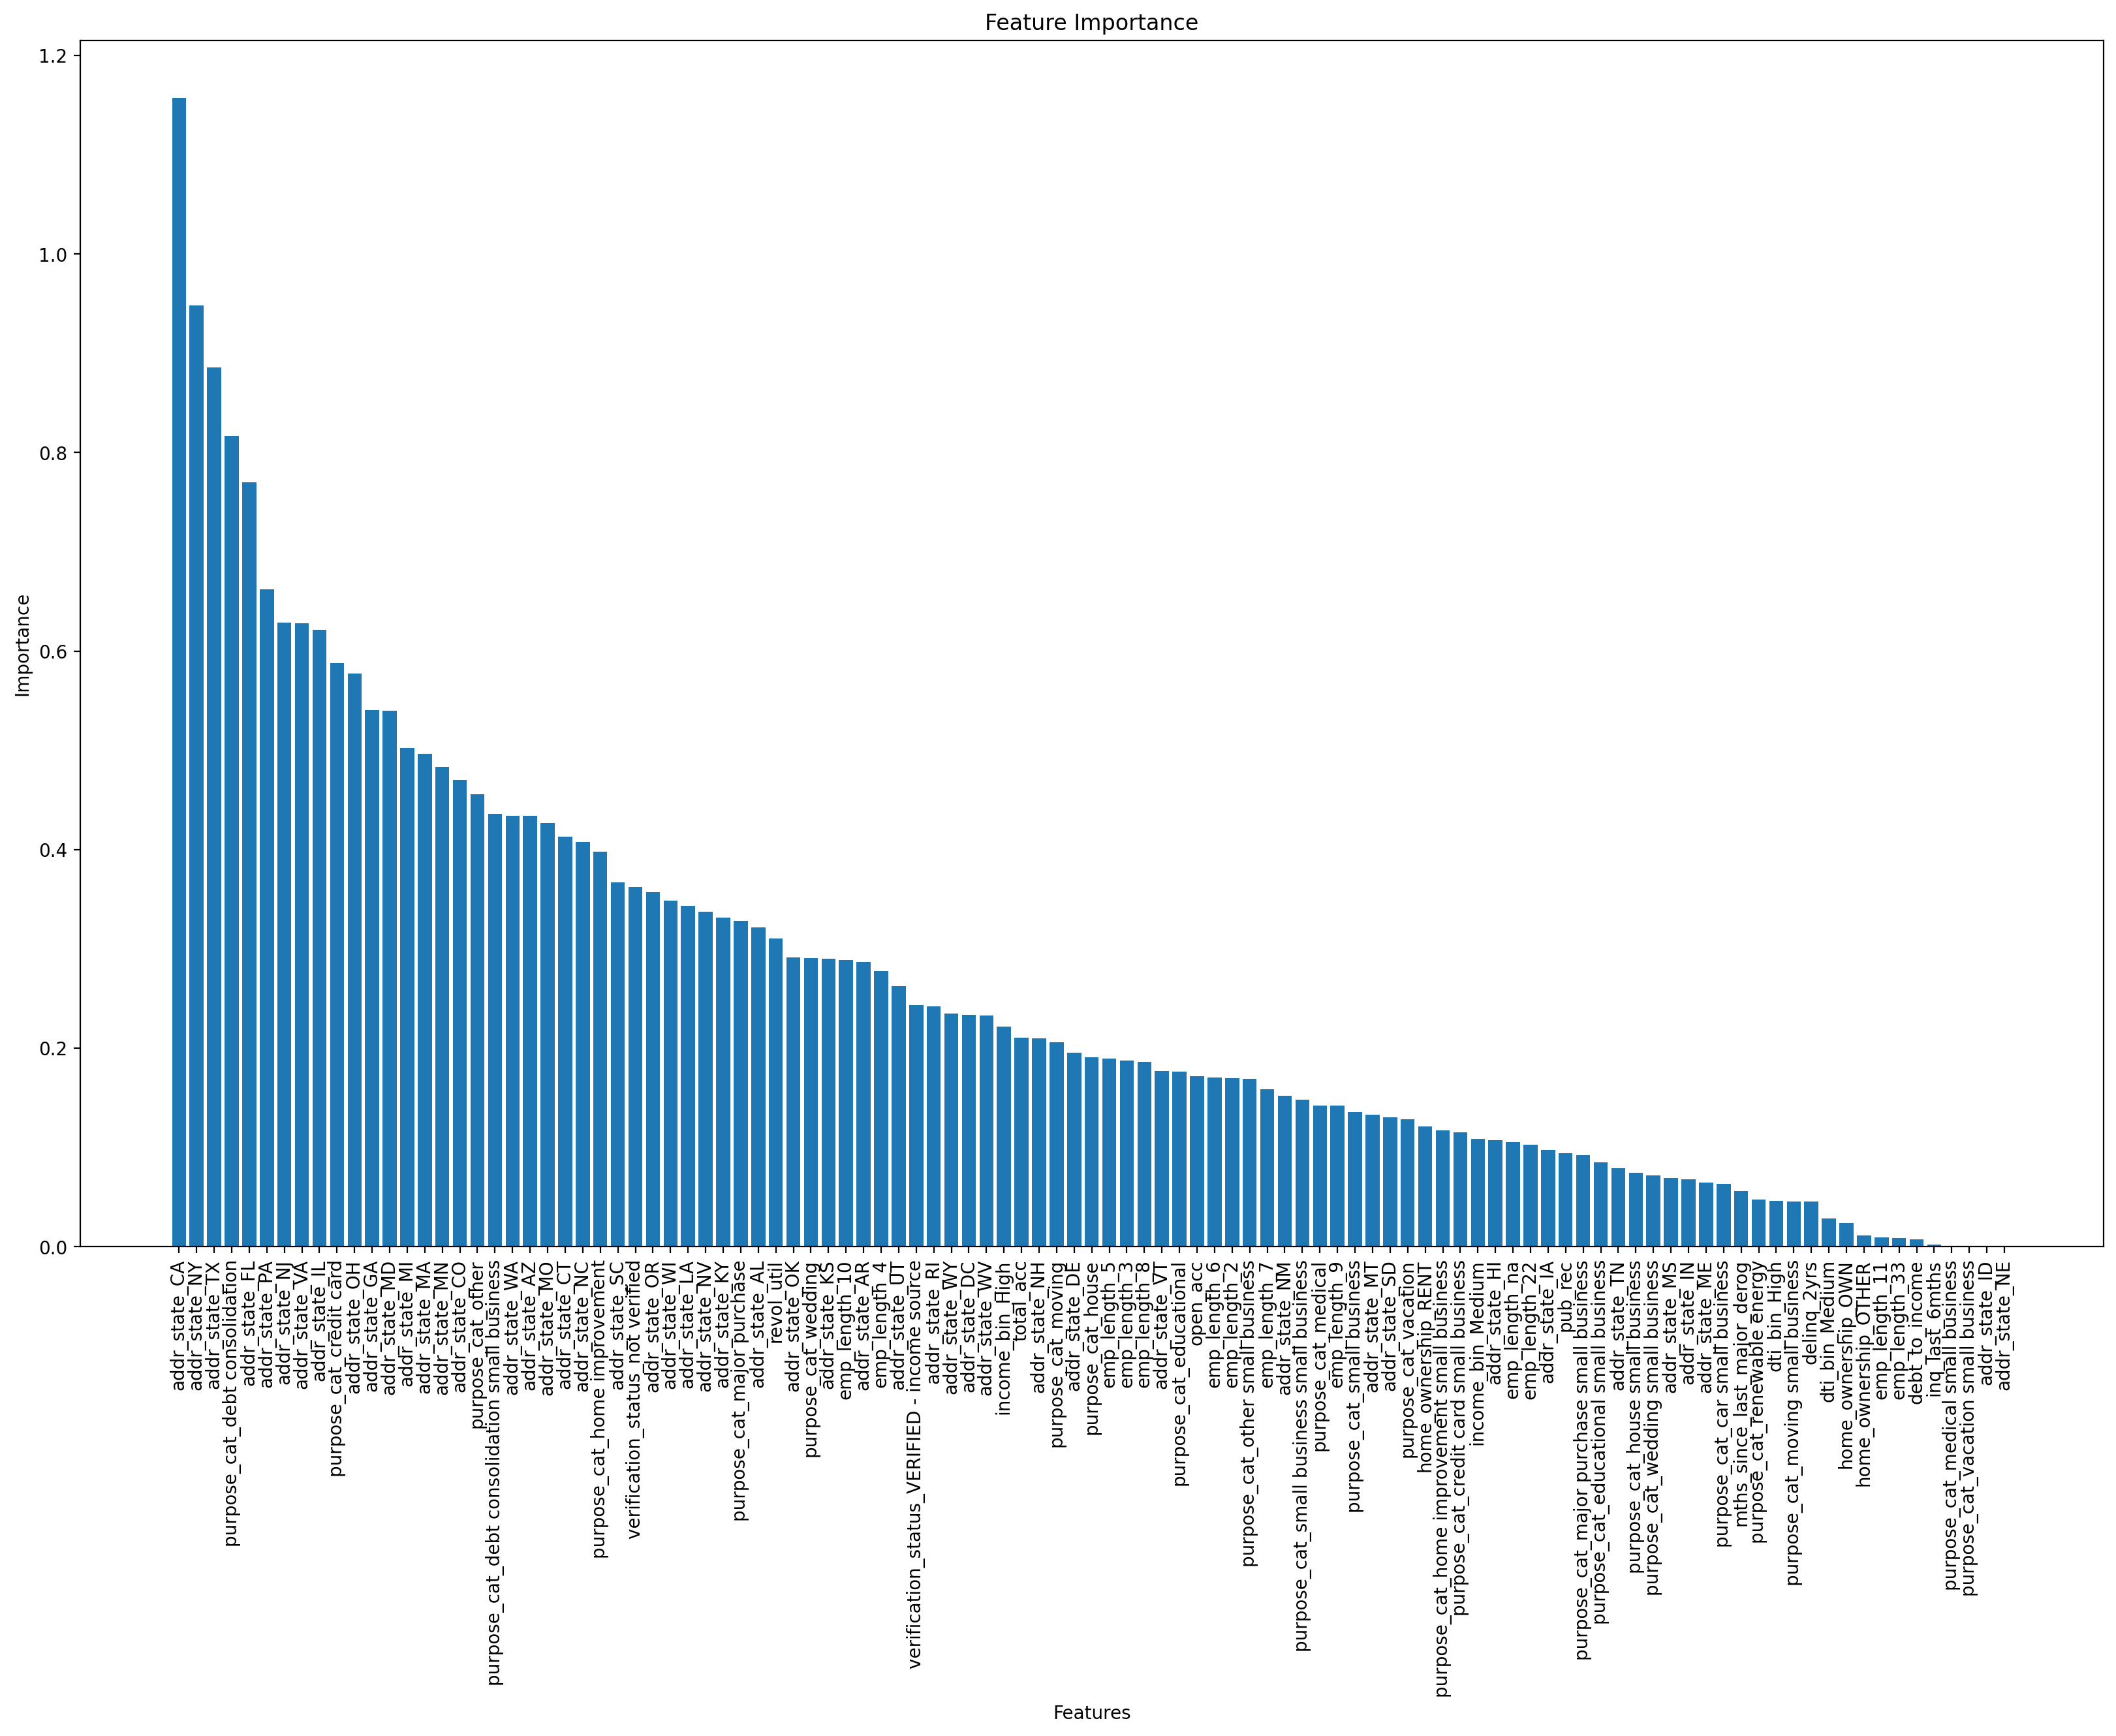

In [89]:
plt.figure(figsize=(20, 12), dpi=200)
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

In [96]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [97]:
y_pred = log_model.predict(scaled_X_test)

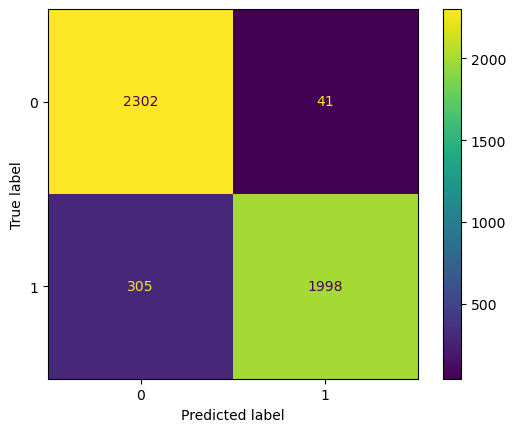

In [98]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2343
           1       0.98      0.87      0.92      2303

    accuracy                           0.93      4646
   macro avg       0.93      0.93      0.93      4646
weighted avg       0.93      0.93      0.93      4646



In [100]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

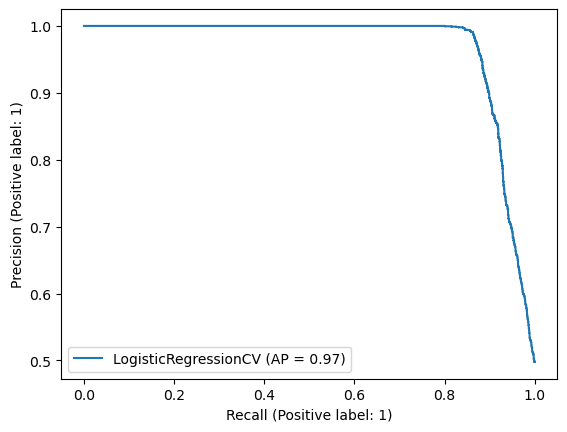

In [101]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

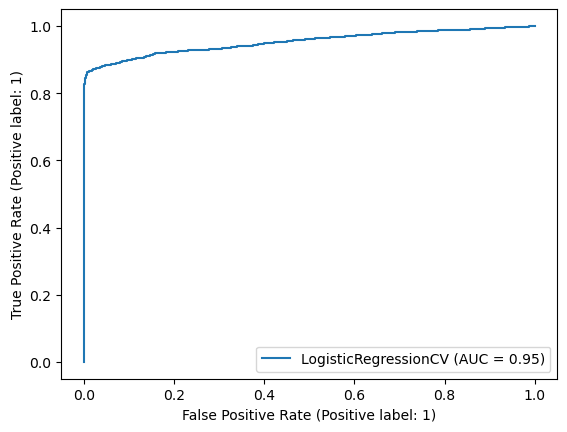

In [102]:
plot_roc_curve(log_model,scaled_X_test,y_test)

### Model 2 (Decision Tree Classifier)

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
model = DecisionTreeClassifier(class_weight='balanced')

In [105]:
model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight='balanced')

In [106]:
base_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

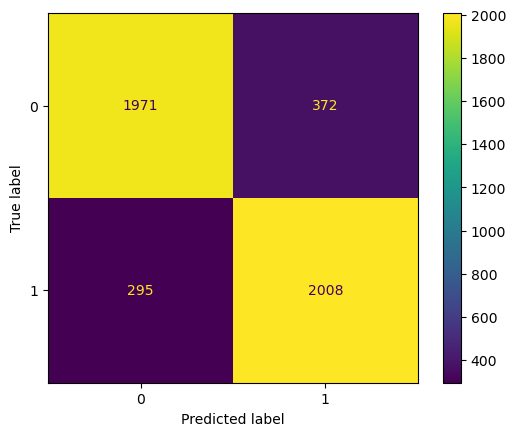

In [108]:
plot_confusion_matrix(model,X_test,y_test)

In [109]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2343
           1       0.84      0.87      0.86      2303

    accuracy                           0.86      4646
   macro avg       0.86      0.86      0.86      4646
weighted avg       0.86      0.86      0.86      4646



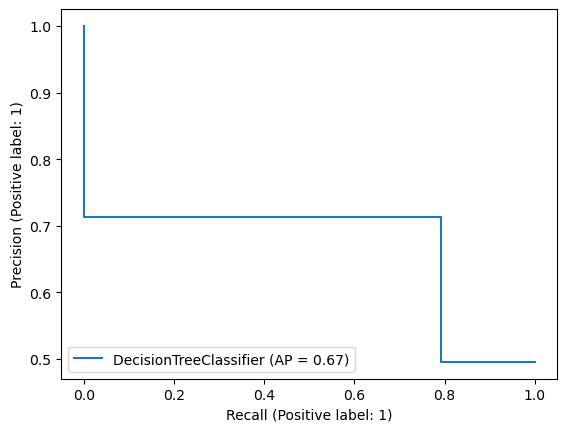

In [110]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

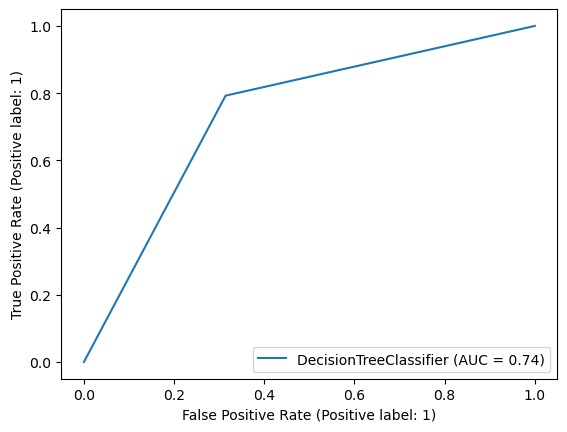

In [111]:
plot_roc_curve(model,scaled_X_test,y_test)

### Model 3 (Random Forest Classifier)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
# Use 10 random trees
rfc_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101,class_weight='balanced')

In [114]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=101)

In [115]:
preds = rfc_model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

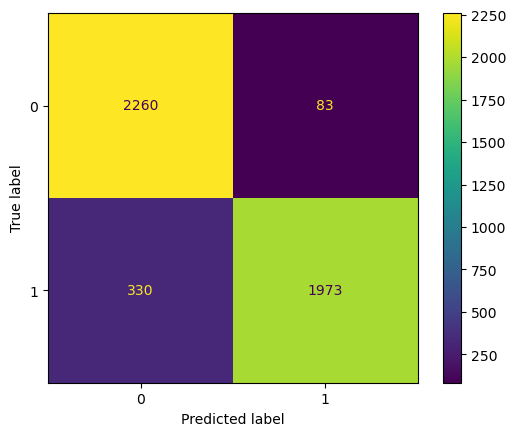

In [117]:
plot_confusion_matrix(rfc_model,X_test,y_test)

In [118]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2343
           1       0.96      0.86      0.91      2303

    accuracy                           0.91      4646
   macro avg       0.92      0.91      0.91      4646
weighted avg       0.92      0.91      0.91      4646



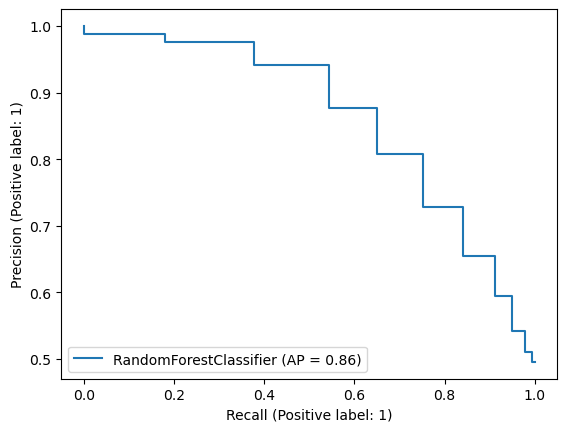

In [119]:
plot_precision_recall_curve(rfc_model,scaled_X_test,y_test)

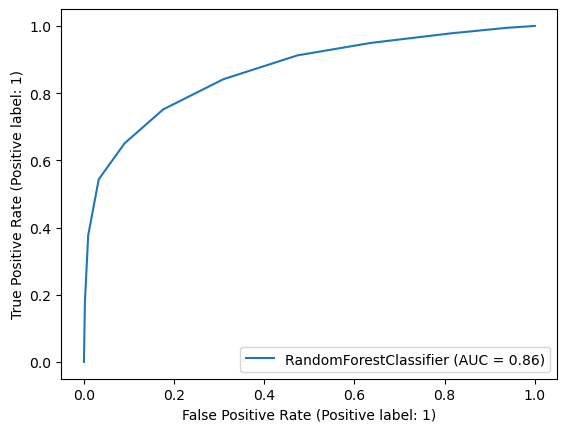

In [120]:
plot_roc_curve(rfc_model,scaled_X_test,y_test)

### Model 4 (Random Forest Classifier - Adjusted Hyperparameters)

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
n_estimators=[64,100,128,200]
max_features= [5,10,15]
bootstrap = [True,False]
oob_score = [True,False]

In [123]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [124]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [125]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [5, 10, 15],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [126]:
grid.best_params_

{'bootstrap': False,
 'max_features': 5,
 'n_estimators': 100,
 'oob_score': False}

In [127]:
predictions = grid.predict(X_test)

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2343
           1       0.98      0.86      0.92      2303

    accuracy                           0.92      4646
   macro avg       0.93      0.92      0.92      4646
weighted avg       0.93      0.92      0.92      4646



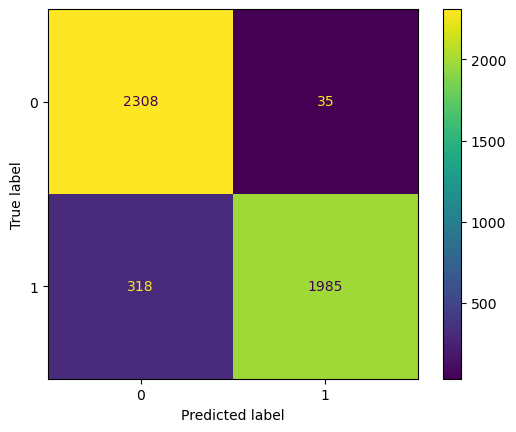

In [129]:
plot_confusion_matrix(grid,X_test,y_test)

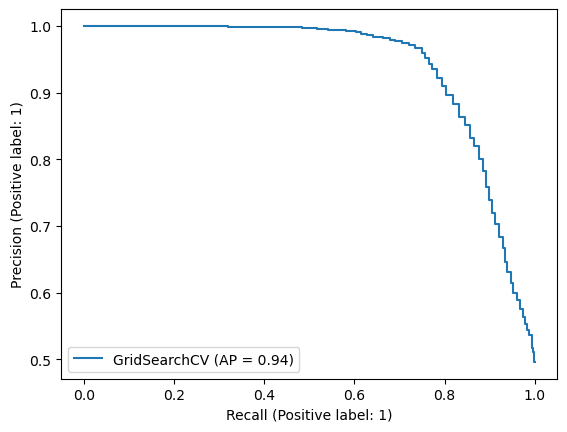

In [130]:
plot_precision_recall_curve(grid,scaled_X_test,y_test)

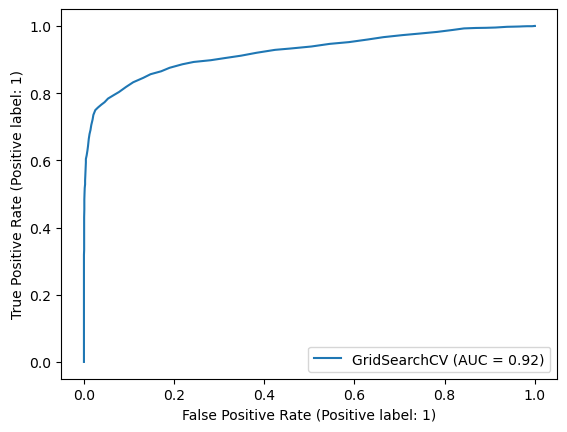

In [131]:
plot_roc_curve(grid,scaled_X_test,y_test)